<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Feature Selection</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Change](#add)
2. [Change](#add)

In [1]:
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from minisom import MiniSom

from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# To create hexagons
from matplotlib.patches import RegularPolygon

# Plotting
from matplotlib import cm # For colormap handling
import matplotlib.colors as mpl_colors
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable # For axe customization

# For cluster's visualization
from sklearn.manifold import TSNE
import umap

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('df2.csv', index_col='customer_id')

In [4]:
df.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660          26.0             2              3   
4eb37a6705             4660          20.0             2              5   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   

             CUI_American  ...  customer_lifecycle_stage  \
customer_id                ...                             
1b8f824d5e           0.00  ...                    Active   
5d272b9dcb          12.82  ...                    Active   
f6d1b2ba63           9.20  ...                    Active   
180c632ed8           0.00  ...                    Active   
4eb37a6705          14.57  ...                    Active   

             vendor_loyalty_score  peak_order_day  peak_order_hour  \
customer_id                                                          
1b8f824d5e                    0.5           DOW_0            HR_18   
5d272b9dcb                    0.5           DOW_0            HR_10   
f6d1b2ba63                    1.0           DOW_0             HR_9   
180c632ed8                    0.5           DOW_1            HR_11   
4eb37a6705                    0.5           DOW_1             HR_8   

             cuisine_variety  available_cuisines_city  \
customer_id                                             
1b8f824d5e                 1                       15   
5d272b9dcb                 2                        8   
f6d1b2ba63                 1                       12   
180c632ed8                 2                       12   
4eb37a6705                 2                       12   

             relative_cuisine_variety  average_spending  order_frequency  \
customer_id                                                                
1b8f824d5e                   0.066667            14.440              2.0   
5d272b9dcb                   0.250000             9.605              2.0   
f6d1b2ba63                   0.083333             4.600              2.0   
180c632ed8                   0.166667            15.780              1.0   
4eb37a6705                   0.166667            27.720              1.0   

             chain_consumption  
customer_id                     
1b8f824d5e                 0.5  
5d272b9dcb                 1.0  
f6d1b2ba63                 1.0  
180c632ed8                 0.5  
4eb37a6705                 0.0  

[5 rows x 70 columns]

In [5]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_23']

# calculate the total number of orders for different times of the day
dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())  # Sum of orders from 12 AM to 6 AM
morning = sum(df.loc[:, 'HR_7':'HR_12'].sum())  # Sum of orders from 7 AM to 12 PM
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())  # Sum of orders from 1 PM to 6 PM
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())  # Sum of orders from 7 PM to 11 PM

# organize total orders for each time of the day in a list
orders_per_moment_of_day = [dawn, morning, afternoon, night]

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# calculate the sum of orders for each day of the week
orders_per_dow_sum = orders_per_dow.sum()

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']

# calculate the sum of the amount spent for each cuisine type
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [6]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'age_group', 'customer_city', 'total_orders', 'days_since_last_order',
       'customer_lifecycle_stage', 'vendor_loyalty_score', 'peak_order_day',
       'peak_order_hour', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_v

# Correlation Matrix

In [7]:
categorical_features = ['customer_region', 'last_promo', 'payment_method','age_group', 'customer_city', 
                        'customer_lifecycle_stage','peak_order_day','peak_order_hour','available_cuisines_city']

In [8]:
columns_to_drop = list(orders_per_hour.columns) + list(orders_per_dow.columns) + list(amount_spent_per_cuisine.columns) + categorical_features
df_corr = df.drop(columns_to_drop, axis=1)

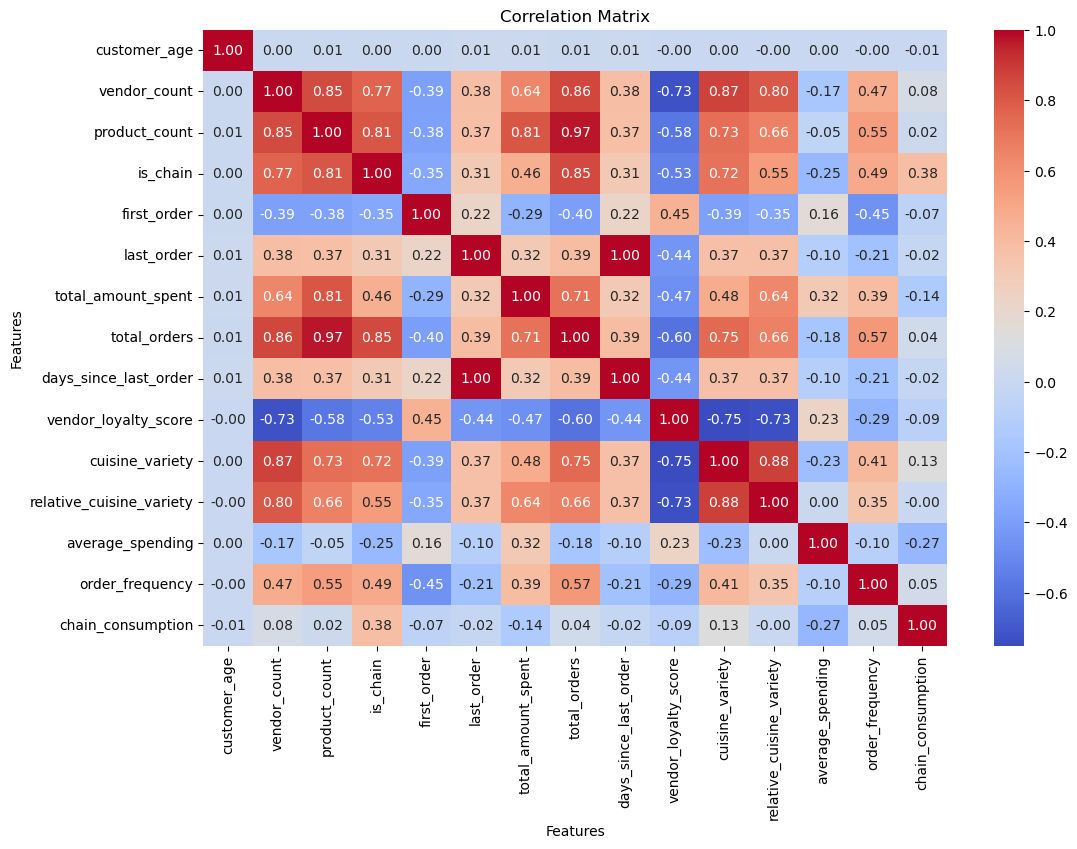

In [9]:
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

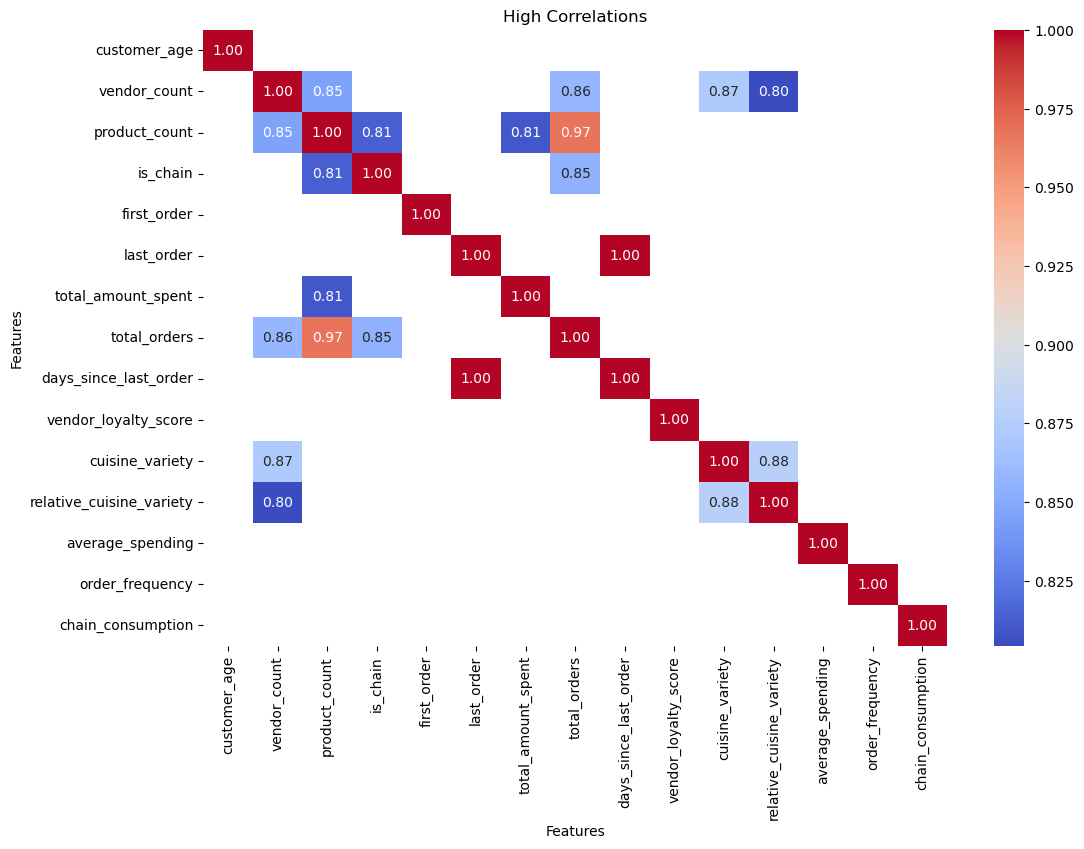

In [10]:
# Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Filter the correlations above 0.8
high_corr_matrix = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with only high correlations
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=high_corr_matrix.isna())

# Adding titles and labels
plt.title('High Correlations')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [11]:
df_corr.drop(['vendor_count', 'product_count', 'is_chain', 'last_order', 'cuisine_variety'], axis=1, inplace=True)

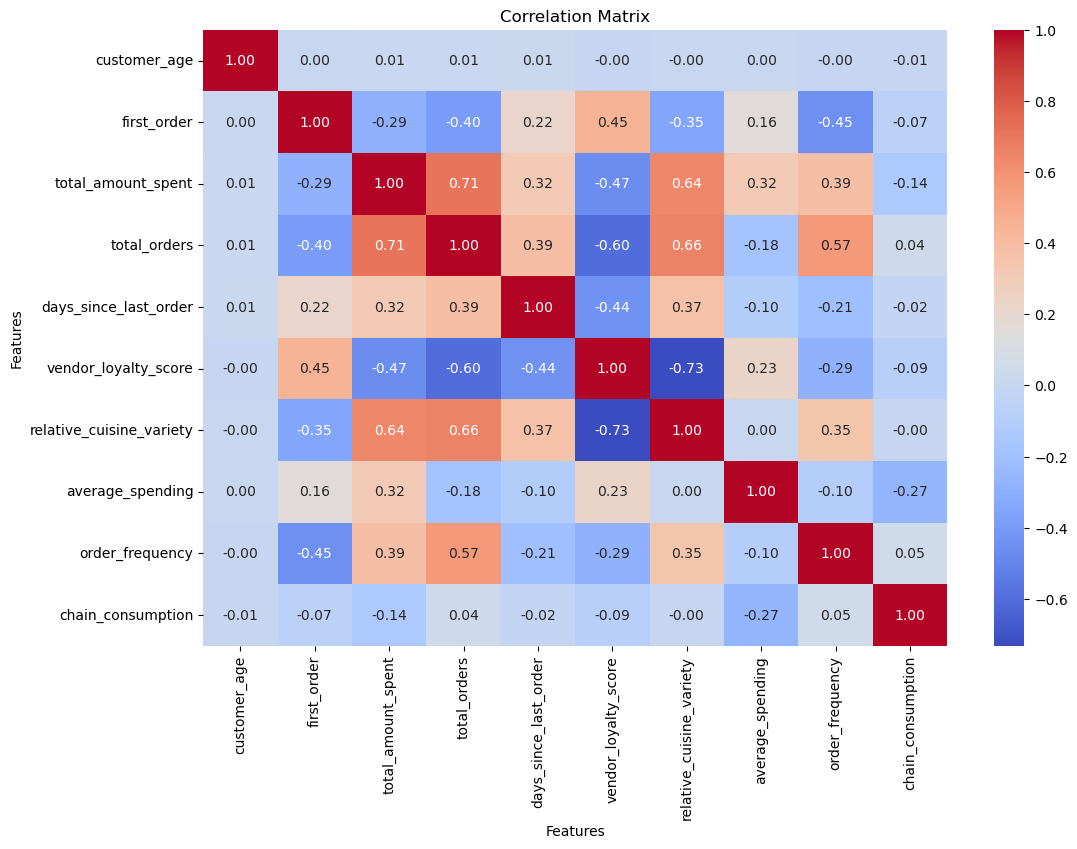

In [12]:
correlation_matrix = df_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [13]:
df_corr.columns

Index(['customer_age', 'first_order', 'total_amount_spent', 'total_orders',
       'days_since_last_order', 'vendor_loyalty_score',
       'relative_cuisine_variety', 'average_spending', 'order_frequency',
       'chain_consumption'],
      dtype='object')

# Perspectives

**Preference-based** - vendor_loyalty_score, relative_cuisine_variety, chain_consumption

**Behavioral** - first_order, days_since_last_order, order_frequency, total_orders, total_amount_spent, average_spending

In [14]:
preferences = df[['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']]

behaviors = df[['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
                'total_amount_spent', 'average_spending']]

## Self-Organizing Maps

### Preference-based Perspective

In [15]:
# Deciding the grid size for the SOM using a formula based on the number of rows in the dataset
grid_size = 5 * (preferences.shape[0] ** 0.5)

print(f'The product of M and N should be close to {round(grid_size,2)}')
print(f'Thus M and N should be close to {round(grid_size ** 0.5,2)}')

The product of M and N should be close to 887.54
Thus M and N should be close to 29.79


c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
c:\Users\marga\Documents\anaconda\Lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\marga\Documents\anaconda\Lib\site-packages\numpy\linalg\linalg.py:2542: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:405: RuntimeWarning: overflow encountered in add
  self._weights += einsum('ij, ijk->ijk', g, x-self._weights)
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:629: RuntimeWarning: overflow encountered in power
  weights_flat_sq = power(weights_flat, 2).sum(axis=1, keepdims=True)
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:191: UserWarning: triangle neighborhood function do

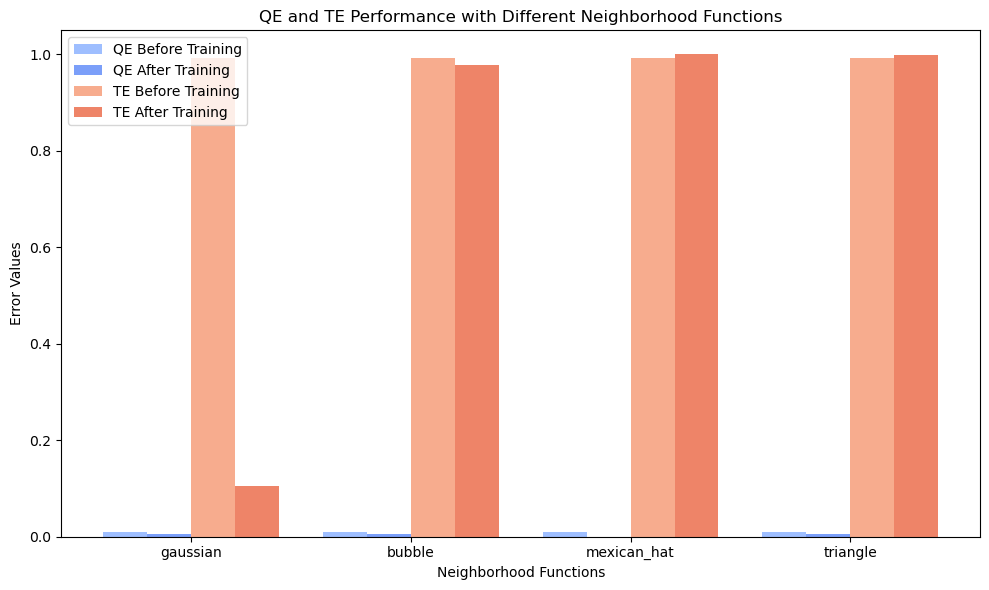

In [16]:
# Comparing the performance of different neighborhood functions
som_data = preferences.values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
M = 30
N = 30  
n_feats = len(preferences.columns) # Number of features used in the SOM

# List of neighborhood functions to test
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

# Lists to store QE and TE values for each neighborhood function
qe_values = []
te_values = []

# Train the SOM with each neighborhood function
for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    # Initialize the weights of the SOM picking random samples from data
    sm.random_weights_init(som_data)
    
    # Errors before training
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    # Train the SOM
    sm.train_batch(preferences.values,
                   num_iteration=50000)
    
    # Errors after training
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    # Store QE and TE values after training
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot QE and TE for each neighborhood function
width = 0.2  # Width of the bars
x_pos = np.arange(len(neighborhood_functions))  # Position for each neighborhood function

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

# Plot QE values
ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

# Plot TE values
ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

# Customize plot
ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)  # Align tick labels with the grouped bars
ax.set_xticklabels(neighborhood_functions)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

In [17]:
# Actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(preferences.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # According to the previous plot, the gaussian function performed better
   topology = 'hexagonal', # Both hexagonal and rectangular topologies were tested, hexagonal performed better
   random_seed=42)

sm.random_weights_init(preferences.values)
initial_qe = sm.quantization_error(preferences.values)
initial_te = sm.topographic_error(preferences.values)

sm.train(preferences.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

final_qe = sm.quantization_error(preferences.values)
final_te = sm.topographic_error(preferences.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


Intital quantization error vs After training [0.0097 0.0041]
Intital topographic error vs After training [0.9936 0.0525]


In [18]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(30, 30, 3)

In [19]:
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False):     

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='small')


    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf 

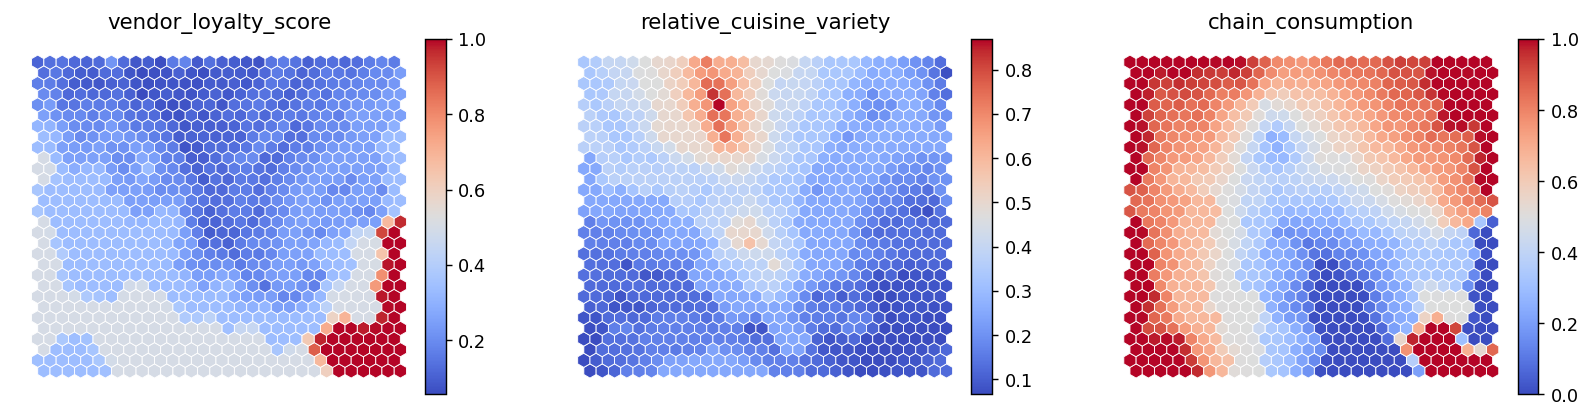

In [20]:
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(1, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(preferences.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)

    sf = plot_hexagons(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=preferences.columns[cpi],
        cmap=cm.coolwarm)

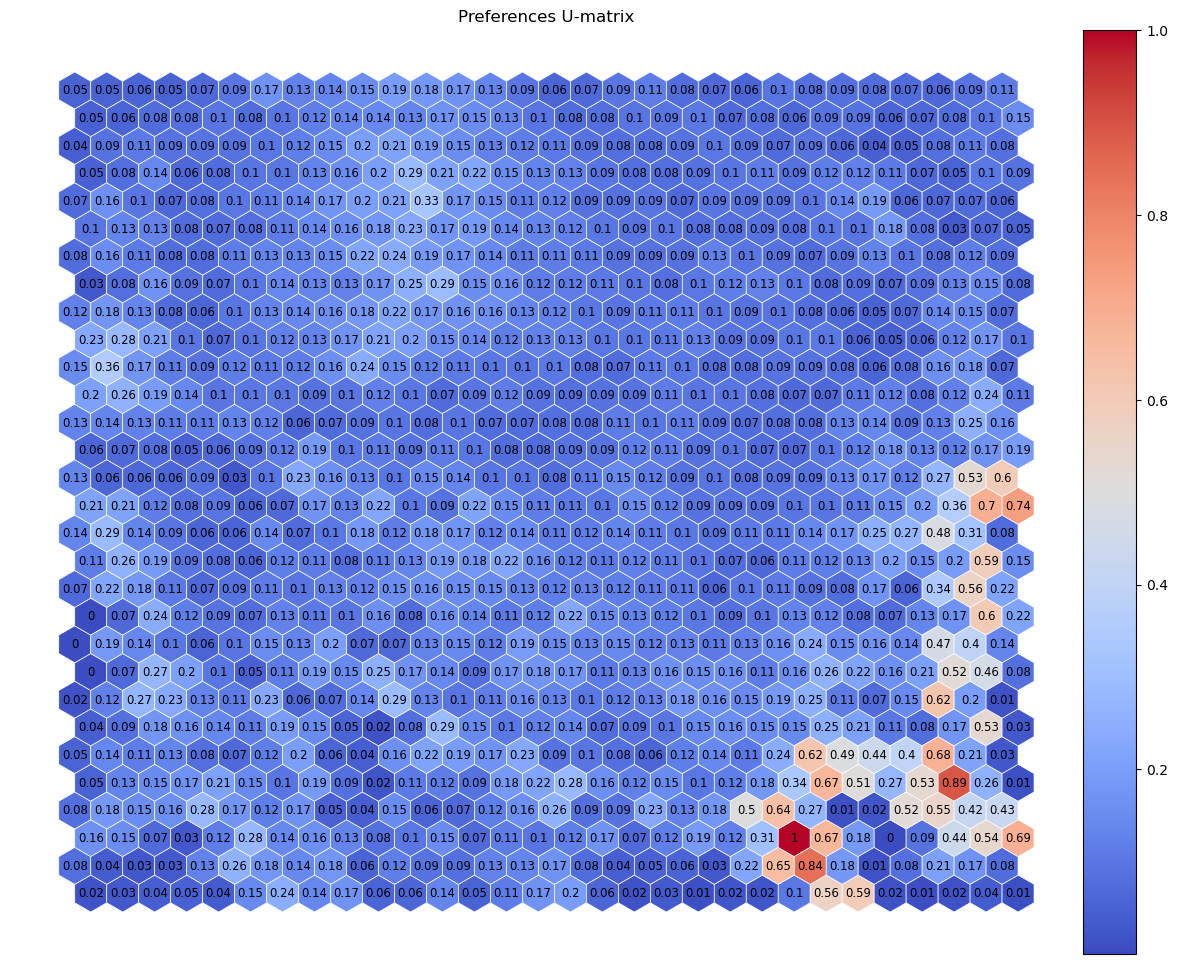

In [21]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Preferences U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

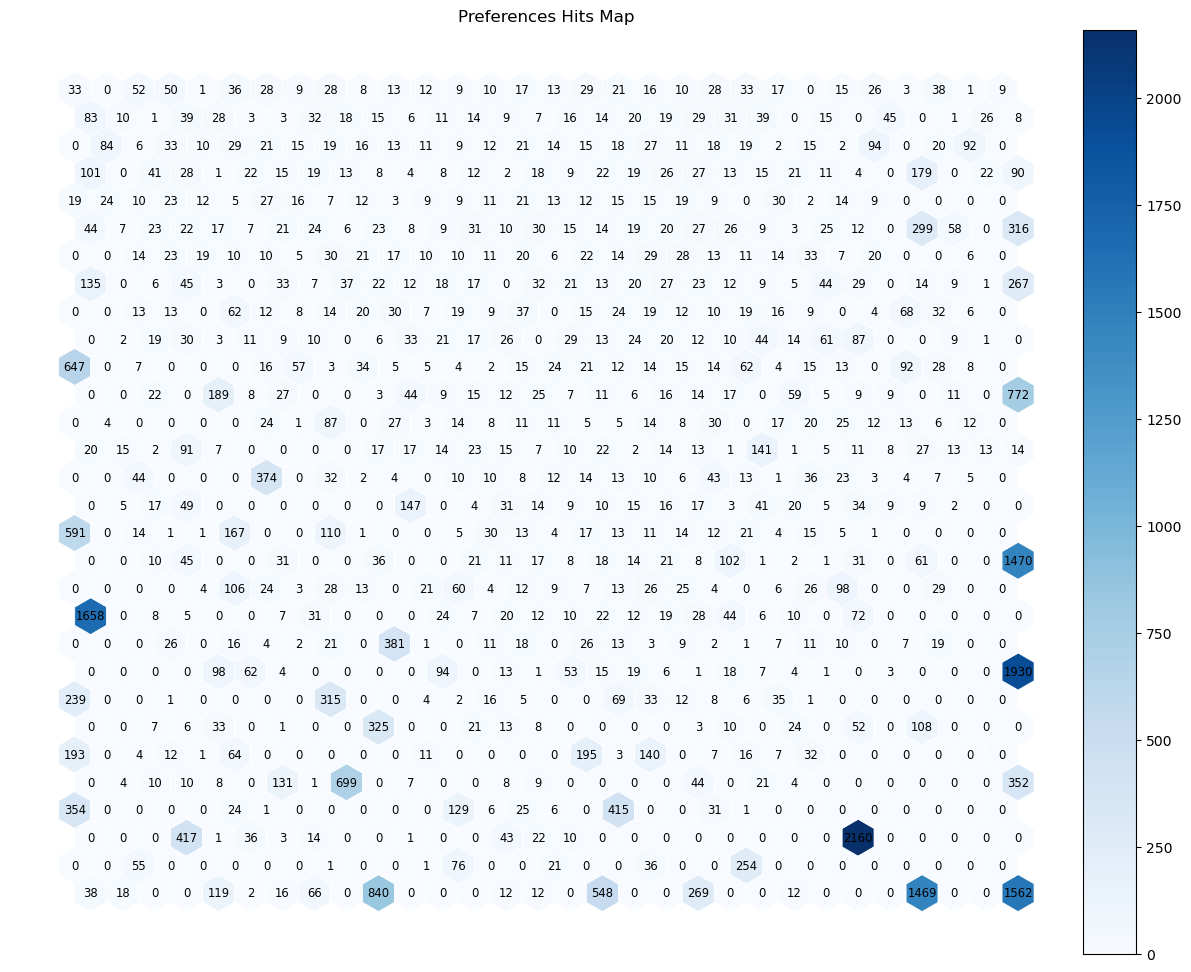

In [22]:
hitsmatrix = sm.activation_response(preferences.values)


fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Preferences Hits Map",
                    cmap=cm.Blues,
                    annot=True)

In [23]:
range_clusters = range(1, 10)
inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(preferences)
    inertia.append(kmclust.inertia_)

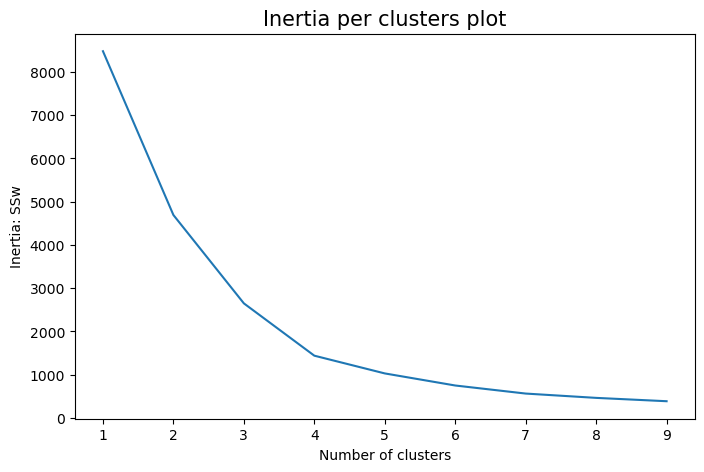

In [24]:
# Plotting inertia

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [25]:
weights_flat = sm.get_weights().reshape((M*N),len(preferences.columns))
weights_flat.shape

(900, 3)

In [26]:
# Perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(weights_flat)

c:\Users\marga\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


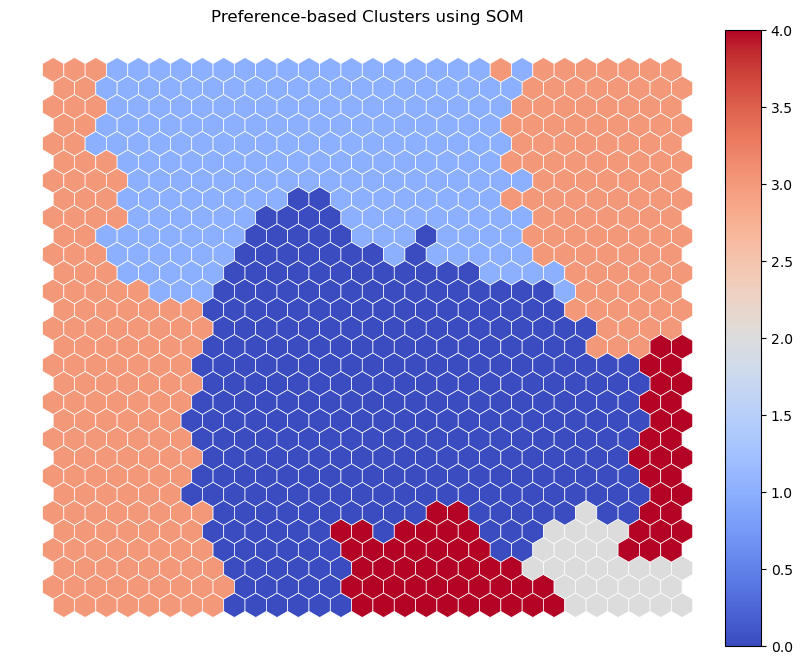

In [27]:
kmeans_matrix = kmeans_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Preference-based Clusters using SOM",
                    cmap=cm.coolwarm)

In [ ]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index
som_preferences_score = silhouette_score(weights_flat, kmeans_labels, metric='euclidean')
# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
print(f'Silhouette Score: {round(som_preferences_score,3)}') 

som_preferences_index = davies_bouldin_score(weights_flat, kmeans_labels)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(som_preferences_index,3)}')

Silhouette Score: 0.328
Davies-Bouldin Index: 0.94


In [29]:
# Check the nodes and and respective clusters
nodes = weights_flat

df_nodes = pd.DataFrame(nodes, columns=preferences.columns)
df_nodes['som_cluster'] = kmeans_labels
df_nodes

vendor_loyalty_score  relative_cuisine_variety  chain_consumption  \
0                0.333333                  0.067278           1.000000   
1                0.342288                  0.067150           0.999324   
2                0.499933                  0.066681           1.000000   
3                0.500000                  0.066667           1.000000   
4                0.500000                  0.072929           0.999419   
..                    ...                       ...                ...   
895              0.250000                  0.183606           1.000000   
896              0.249999                  0.131571           1.000000   
897              0.228435                  0.155040           0.999999   
898              0.244515                  0.073993           0.999916   
899              0.160555                  0.130441           0.996384   

     som_cluster  
0              3  
1              3  
2              3  
3              3  
4              3  
..           ...  
895            3  
896            3  
897            3  
898            3  
899            3  

[900 rows x 4 columns]

In [30]:
# Getting BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in preferences.values])

print(bmu_index.shape)

bmu_index

(31509, 2)


array([[24,  6],
       [ 0, 19],
       [26,  0],
       ...,
       [29,  8],
       [26,  0],
       [24,  2]], dtype=int64)

In [31]:
som_final_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [32]:
preferences_columns = preferences.columns.tolist()

df_preferences = preferences.copy()
df_preferences['som_cluster'] = som_final_labels

df_preferences.head()

vendor_loyalty_score  relative_cuisine_variety  \
customer_id                                                   
1b8f824d5e                    0.5                  0.066667   
5d272b9dcb                    0.5                  0.250000   
f6d1b2ba63                    1.0                  0.083333   
180c632ed8                    0.5                  0.166667   
4eb37a6705                    0.5                  0.166667   

             chain_consumption  som_cluster  
customer_id                                  
1b8f824d5e                 0.5            0  
5d272b9dcb                 1.0            3  
f6d1b2ba63                 1.0            2  
180c632ed8                 0.5            0  
4eb37a6705                 0.0            4

In [33]:
# Characterizing the final clusters
df_preferences[preferences_columns + ['som_cluster']].groupby('som_cluster').mean()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption
som_cluster                                                                   
0                        0.349521                  0.247436           0.367711
1                        0.156069                  0.424573           0.718704
2                        1.000000                  0.088936           1.000000
3                        0.366860                  0.195177           0.926012
4                        0.827782                  0.119677           0.003957

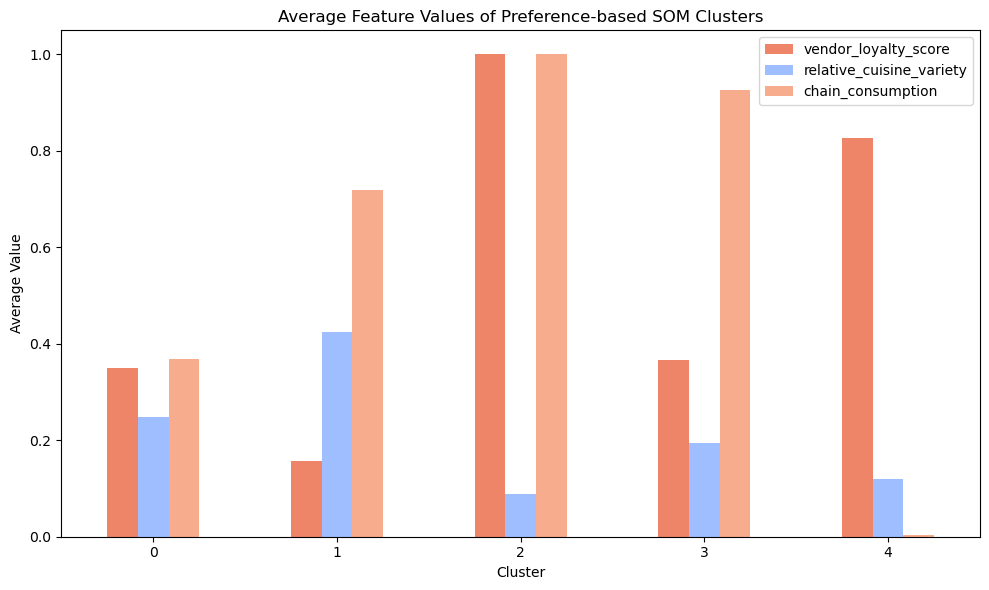

In [34]:
# Assuming 'df_preferences' already has the 'som_clusters' column and the features to plot
features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# Group by 'som_clusters' and compute the mean
cluster_means = df_preferences[features + ['som_cluster']].groupby('som_cluster').mean()

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.8)
relative_cuisine_variety_color = cmap(0.3)
chain_consumption_color = cmap(0.7)

colors = [vendor_loyalty_score_color, relative_cuisine_variety_color, chain_consumption_color]

# Plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preference-based SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [35]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_preferences)  # get total sum of squares
ssw_labels = df_preferences[preferences_columns + ['som_cluster']].groupby('som_cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.983

### Cluster visualization using U-Map

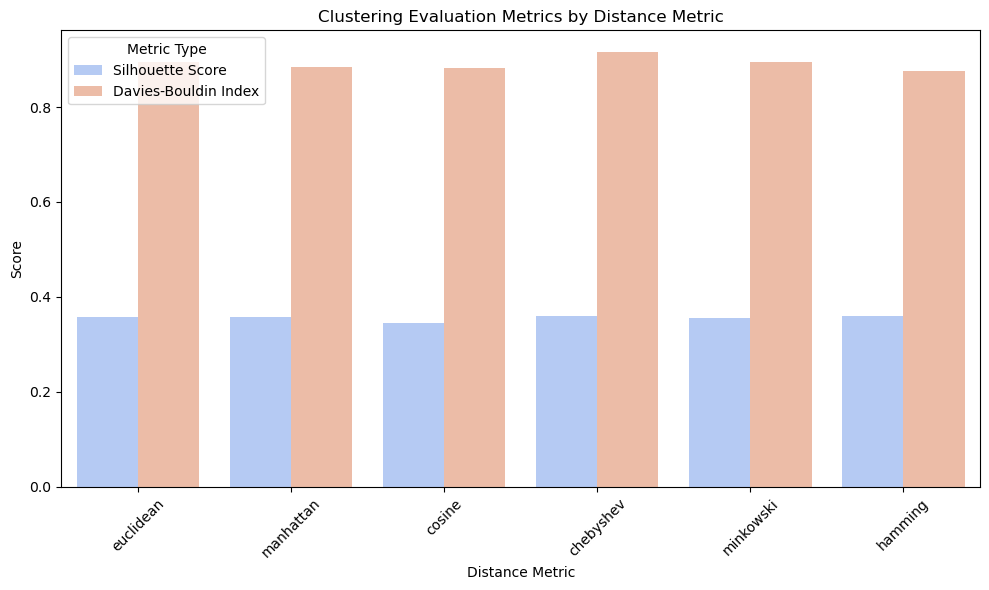

In [82]:
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'minkowski', 'hamming']

# Initialize lists to store results
silhouette_scores = []
db_scores = []

# Loop through each distance metric
for metric in distance_metrics:
    # Apply UMAP with the current metric
    reducer = umap.UMAP(n_neighbors=5, n_components=2, metric=metric)
    embedding = reducer.fit_transform(df_preferences[preferences_columns])

    # Perform clustering
    kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)
    cluster_labels = kmeans.labels_

    # Evaluate clustering
    silhouette = silhouette_score(embedding, cluster_labels)
    db_index = davies_bouldin_score(embedding, cluster_labels)

    silhouette_scores.append(silhouette)
    db_scores.append(db_index)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': distance_metrics,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': db_scores
})

# Reshape data for plotting
results_melted = results_df.melt(id_vars='Metric', value_vars=['Silhouette Score', 'Davies-Bouldin Index'], 
                                 var_name='Metric Type', value_name='Score')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Metric Type', data=results_melted, palette='coolwarm')

# Adjusting plot aesthetics
plt.title('Clustering Evaluation Metrics by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [79]:
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine')
embedding = reducer.fit_transform(df_preferences[preferences_columns], y=df_preferences['som_cluster']) 
embedding

array([[ 14.070184  , -11.590963  ],
       [  0.5941936 ,   0.62362546],
       [ 11.201814  ,  -4.6232114 ],
       ...,
       [ 16.481083  ,  -3.5096939 ],
       [ 12.223473  ,  -6.733829  ],
       [  9.2723055 , -10.018645  ]], dtype=float32)

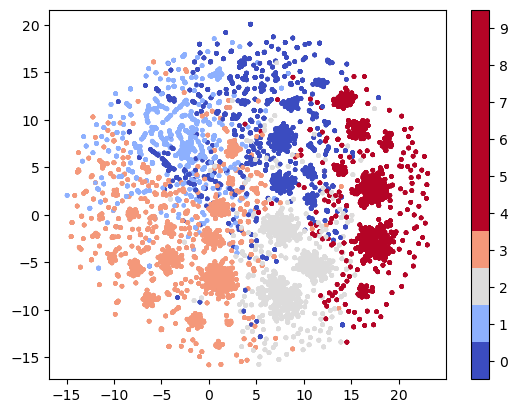

In [80]:
plt.scatter(embedding[:, 0], embedding[:, 1], c= df_preferences['som_cluster'], cmap='coolwarm', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

In [81]:
silhouette_avg = silhouette_score(embedding, df_preferences['som_cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(embedding, df_preferences['som_cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.20
Davies-Bouldin Index: 1.09


### Cluster visualization using t-SNE

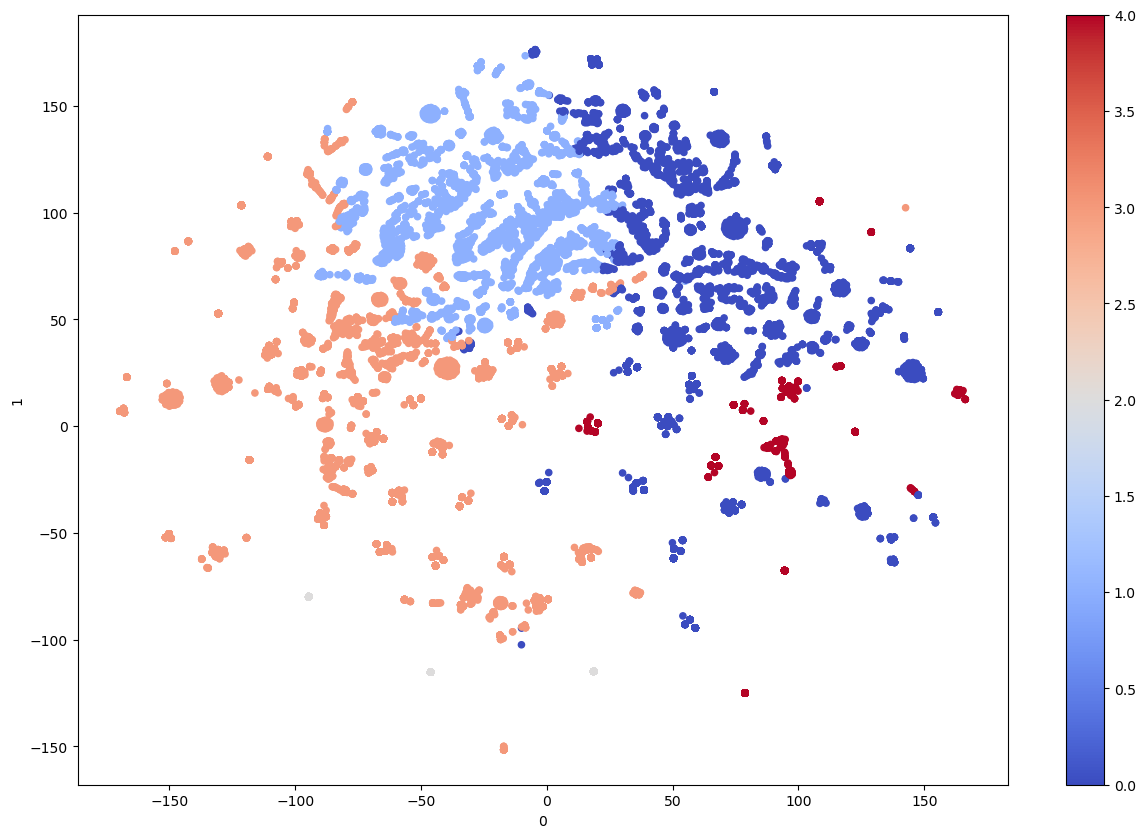

In [50]:
# This is step can be quite time consuming - don't forget to only use metric features
two_dim = TSNE(random_state=42).fit_transform(df_preferences[preferences_columns])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_preferences['som_cluster'], colormap='coolwarm', figsize=(15,10))
plt.show()

### Behavioral Perspective

c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
c:\Users\marga\Documents\anaconda\Lib\site-packages\numpy\linalg\linalg.py:2542: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
c:\Users\marga\Documents\anaconda\Lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:629: RuntimeWarning: overflow encountered in power
  weights_flat_sq = power(weights_flat, 2).sum(axis=1, keepdims=True)
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:191: UserWarning: triangle neighborhood function does not take in account hexagonal topology
  warn('triangle neighborhood function does not ' +


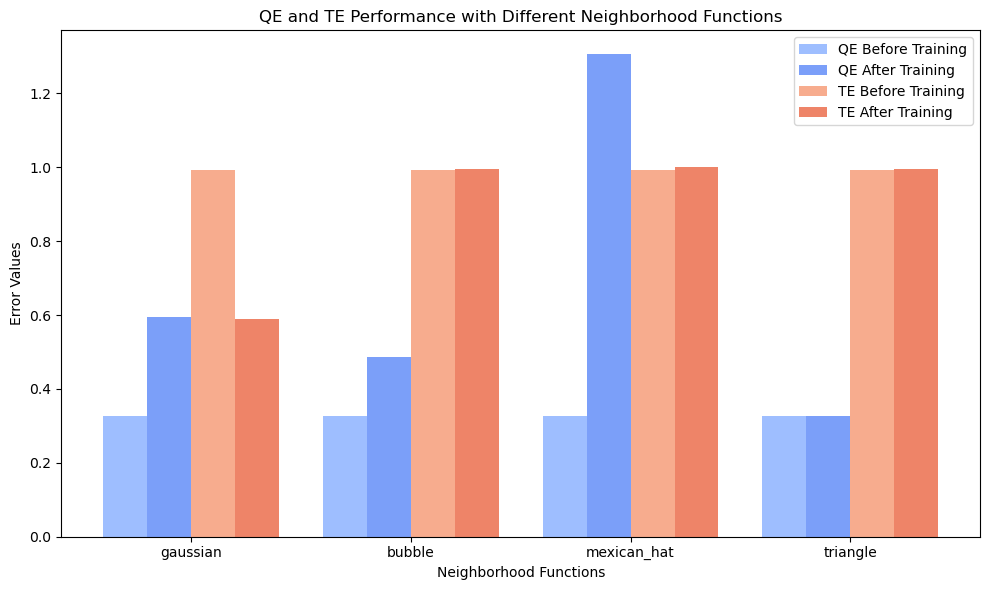

In [246]:
# Comparing the performance of different neighborhood functions
som_data = behaviors.values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
M = 30
N = 30  
n_feats = len(behaviors.columns) # Number of features used in the SOM

# List of neighborhood functions to test
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

# Lists to store QE and TE values for each neighborhood function
qe_values = []
te_values = []

# Train the SOM with each neighborhood function
for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    # Initialize the weights of the SOM picking random samples from data
    sm.random_weights_init(som_data)
    
    # Errors before training
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    # Train the SOM
    sm.train_batch(behaviors.values,
                   num_iteration=50000)
    
    # Errors after training
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    # Store QE and TE values after training
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot QE and TE for each neighborhood function
width = 0.2  # Width of the bars
x_pos = np.arange(len(neighborhood_functions))  # Position for each neighborhood function

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

# Plot QE values
ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

# Plot TE values
ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

# Customize plot
ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)  # Align tick labels with the grouped bars
ax.set_xticklabels(neighborhood_functions)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

In [252]:
# Actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.3 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(behaviors.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # According to the previous plot, the gaussian function performed better
   topology = 'rectangular', # Both hexagonal and rectangular topologies were tested, hexagonal performed better
   random_seed=42)

sm.random_weights_init(behaviors.values)
initial_qe = sm.quantization_error(behaviors.values)
initial_te = sm.topographic_error(behaviors.values)

sm.train(behaviors.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

final_qe = sm.quantization_error(behaviors.values)
final_te = sm.topographic_error(behaviors.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [0.3262 0.2611]
Intital topographic error vs After training [0.991  0.2861]


In [253]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(30, 30, 6)

In [280]:
from matplotlib.patches import Rectangle

def plot_rectangles(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False):     
    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            # Convert SOM grid positions to Euclidean coordinates
            wx, wy = som.convert_map_to_euclidean((i,j)) 

            # Create a rectangle instead of a hexagon
            rect = Rectangle((wx - 0.5, wy - 0.5), 1, 1,  # Rectangle with size 1x1
                             facecolor=cmap(colornorm(matrix_vals[i, j])), 
                             alpha=1, 
                             edgecolor='white',
                             linewidth=.5)
            axs.add_patch(rect)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx, wy, annot_val, 
                         ha='center', va='center', 
                         fontsize='small')

    ## Remove axes for rectangle plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf

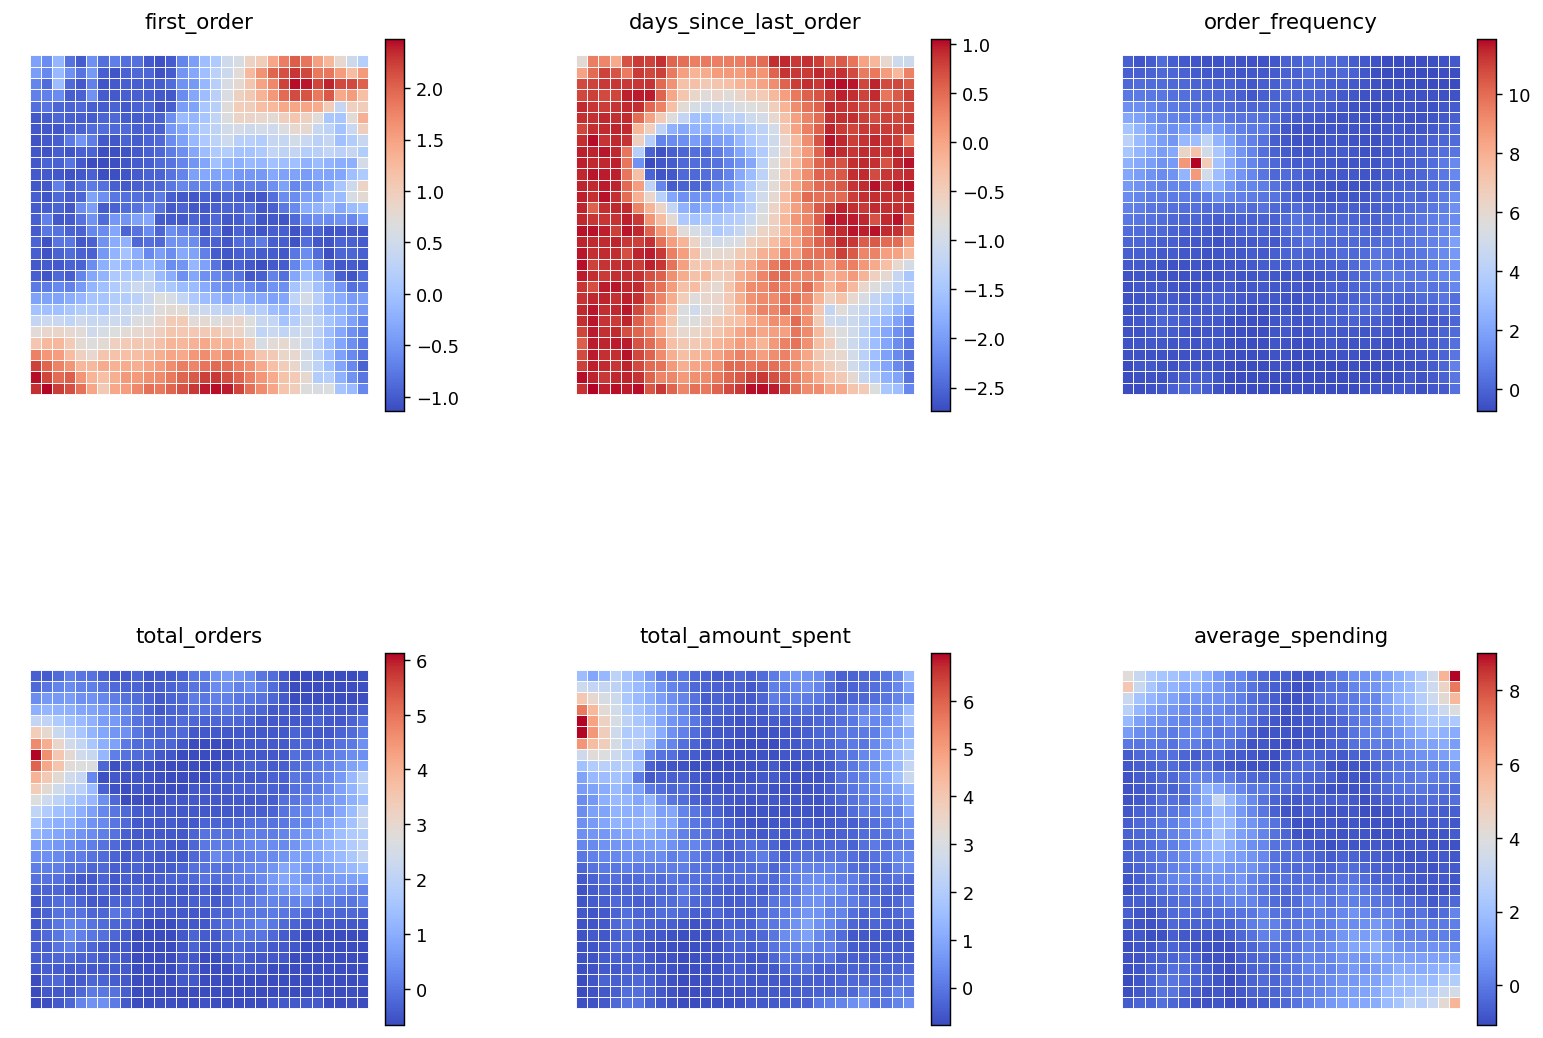

In [281]:
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(2, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(behaviors.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

    sf = plot_rectangles(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=behaviors.columns[cpi],
        cmap=cm.coolwarm)

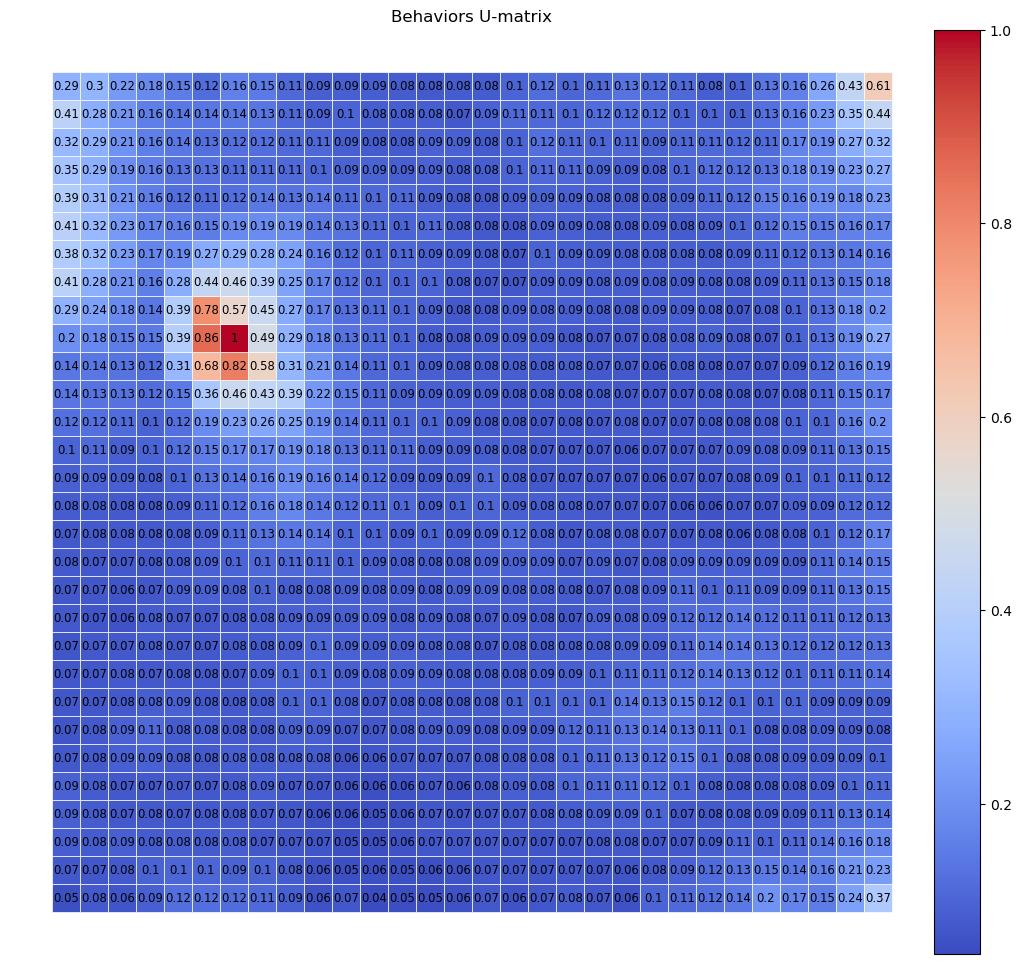

In [282]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Behaviors U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

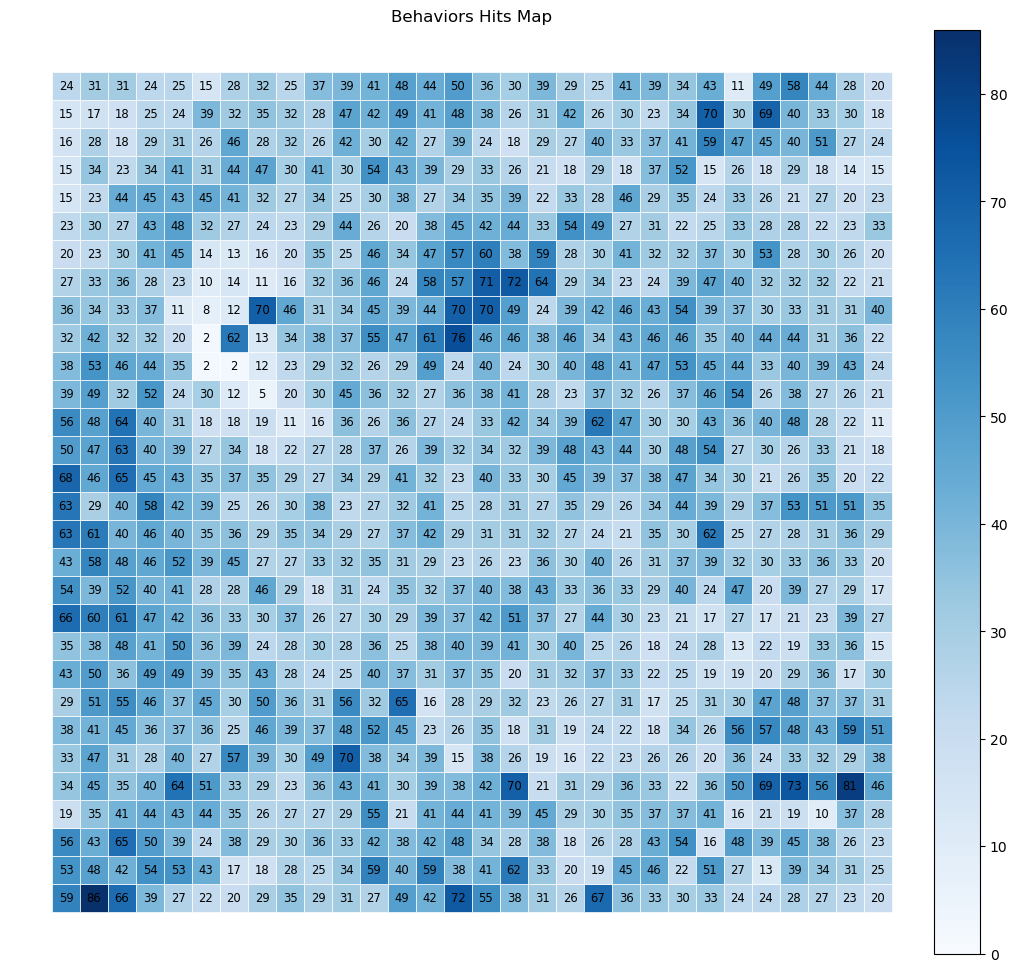

In [283]:
hitsmatrix = sm.activation_response(behaviors.values)


fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Behaviors Hits Map",
                    cmap=cm.Blues,
                    annot=True)

In [257]:
range_clusters = range(1, 10)
inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(behaviors)
    inertia.append(kmclust.inertia_)

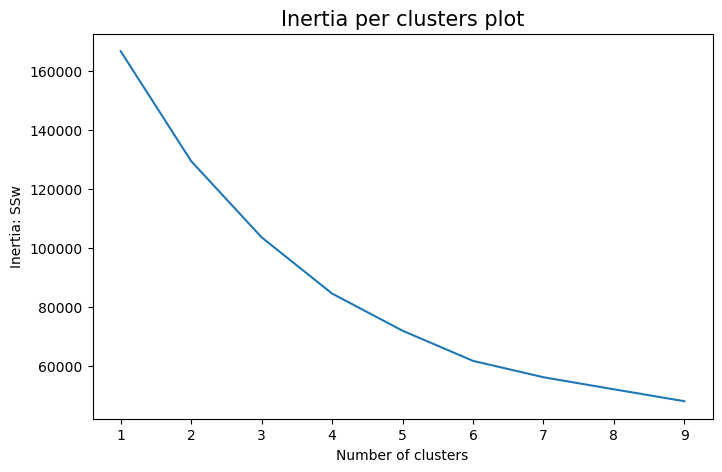

In [258]:
# Plotting inertia

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [266]:
behaviors_weights_flat = sm.get_weights().reshape((M*N),len(behaviors.columns))
behaviors_weights_flat.shape

(900, 6)

In [267]:
# Perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=20, random_state=42)
kmeans_behaviors_labels = kmeans.fit_predict(behaviors_weights_flat)

c:\Users\marga\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


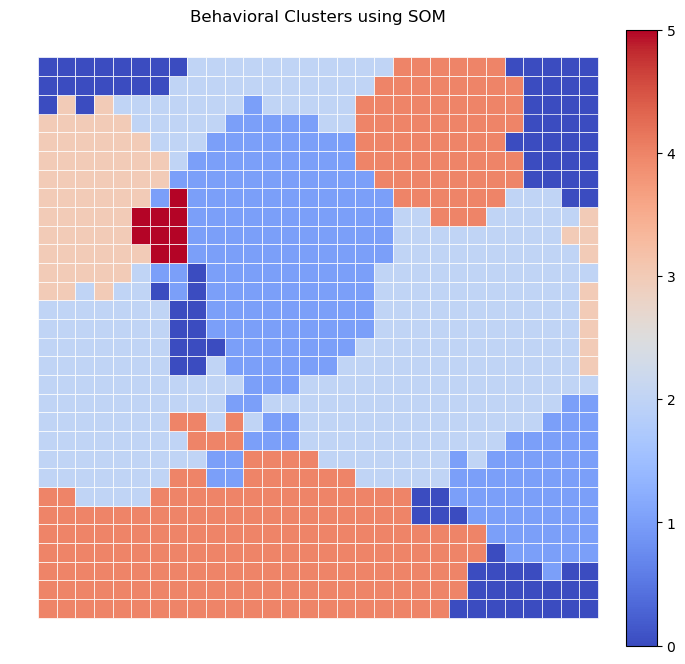

In [284]:
kmeans_matrix = kmeans_behaviors_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Behavioral Clusters using SOM",
                    cmap=cm.coolwarm)

In [269]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index
som_behaviors_score = silhouette_score(behaviors_weights_flat, kmeans_behaviors_labels, metric='euclidean')
# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
print(f'Silhouette Score: {round(som_behaviors_score,3)}') 

som_behaviors_index = davies_bouldin_score(behaviors_weights_flat, kmeans_behaviors_labels)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(som_behaviors_index,3)}') 

Silhouette Score: 0.289
Davies-Bouldin Index: 0.985


In [272]:
# Check the nodes and and respective clusters
behavior_nodes = behaviors_weights_flat

df_behaviors_nodes = pd.DataFrame(behavior_nodes, columns=behaviors.columns)
df_behaviors_nodes['som_cluster'] = kmeans_behaviors_labels
df_behaviors_nodes

first_order  days_since_last_order  order_frequency  total_orders  \
0       2.315823               0.879894        -0.736130     -0.665676   
1       2.441035               1.015516        -0.738810     -0.662427   
2       2.223518               0.799685        -0.715592     -0.641982   
3       1.784036               0.728062        -0.564520     -0.445878   
4       1.098123               0.590888        -0.503757     -0.381816   
..           ...                    ...              ...           ...   
895     0.987562               0.722736        -0.250545     -0.030584   
896     1.186275               0.800885        -0.499770     -0.349413   
897     2.025617               0.618456        -0.704940     -0.640911   
898     1.573343               0.306913        -0.664731     -0.614099   
899     0.200901              -1.064864        -0.370077     -0.605576   

     total_amount_spent  average_spending  som_cluster  
0             -0.724787         -0.699731            4  
1             -0.770715         -0.977937            4  
2             -0.779448         -1.060329            4  
3             -0.717283         -0.996774            4  
4             -0.677330         -0.938500            4  
..                  ...               ...          ...  
895            1.789805          2.393115            0  
896            1.439844          3.892850            0  
897            0.485360          5.603723            0  
898            1.000765          7.247367            0  
899            1.433494          9.008401            0  

[900 rows x 7 columns]

In [273]:
# Getting BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in behaviors.values])

print(bmu_index.shape)

bmu_index

(31401, 2)


array([[ 6, 20],
       [ 6, 20],
       [ 6, 20],
       ...,
       [24, 27],
       [24, 27],
       [ 0,  1]], dtype=int64)

In [274]:
som_final_behavior_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [275]:
behaviors_columns = behaviors.columns.tolist()

df_behaviors = behaviors.copy()
df_behaviors['som_cluster'] = som_final_behavior_labels

df_behaviors.head()

first_order  days_since_last_order  order_frequency  total_orders  \
0    -1.179582              -2.746186        22.754035     -0.471133   
1    -1.179582              -2.746186        22.754035     -0.471133   
2    -1.179582              -2.746186        22.754035     -0.471133   
3    -1.179582              -2.702571        10.938078     -0.471133   
4    -1.179582              -2.702571        10.938078     -0.471133   

   total_amount_spent  average_spending  som_cluster  
0           -0.207887          0.528089            5  
1           -0.415895         -0.087778            5  
2           -0.631216         -0.725299            5  
3           -0.150238          0.698774            5  
4            0.363436          2.219652            5

In [276]:
# Characterizing the final clusters
df_behaviors[behaviors_columns + ['som_cluster']].groupby('som_cluster').mean()

first_order  days_since_last_order  order_frequency  \
som_cluster                                                        
0               0.340809              -0.154692        -0.332253   
1              -0.456398              -1.438037         0.120529   
2              -0.577818               0.526414        -0.055075   
3              -0.864471               0.826398         1.410489   
4               1.278432               0.371721        -0.536850   
5              -1.106875              -2.607843         7.489140   

             total_orders  total_amount_spent  average_spending  
som_cluster                                                      
0               -0.376401            0.568343          2.400834  
1               -0.437024           -0.439267         -0.142411  
2                0.174329           -0.002194         -0.337176  
3                2.283435            2.132461         -0.072396  
4               -0.452388           -0.426328         -0.095241  
5               -0.362723           -0.362425          0.037313

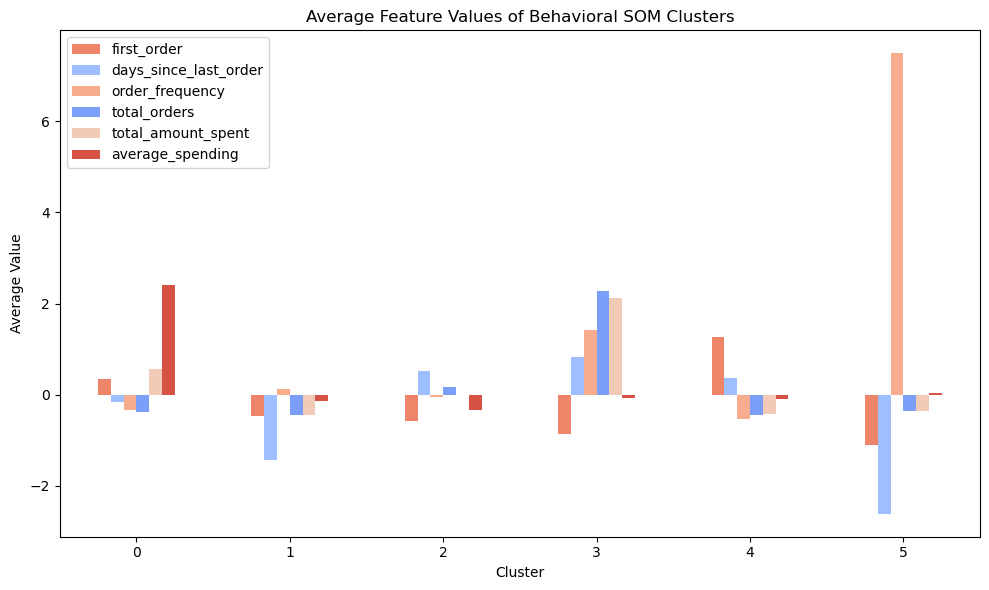

In [277]:
features = ['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
            'total_amount_spent', 'average_spending']

# Group by 'som_clusters' and compute the mean
cluster_means = df_behaviors[features + ['som_cluster']].groupby('som_cluster').mean()

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
first_order_color = cmap(0.8)
days_since_last_order_color = cmap(0.3)
order_frequency_color = cmap(0.7)
total_orders_color = cmap(0.2)
total_amount_spent_color = cmap(0.6)
average_spending_color = cmap(0.9)

colors = [first_order_color, days_since_last_order_color, order_frequency_color,
          total_orders_color, total_amount_spent_color, average_spending_color]

# Plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Behavioral SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [278]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_behaviors)  # get total sum of squares
ssw_labels = df_behaviors[behaviors_columns + ['som_cluster']].groupby('som_cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.713

### K-Means

In [ ]:
# preference features focus more on consumers' habits and preferences, reflecting their choices and inclinations
preferences_features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']
# behavioural features focus more on customer behaviour patterns, such as purchasing tendencies, engament levels and habits
behavioural_features = ['first_order', 'days_since_last_order', 'order_frequency', 
                        'total_orders', 'total_amount_spent', 'average_spending']

df_prf = df[preferences_features].copy()
df_beh = df[behavioural_features].copy()

In [ ]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# set up the clusterers
# n_init = 10 and random_state = 20
kmeans = KMeans(
    init='k-means++',
    n_init=10,
    random_state=20
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

#### Optimal Clusterer on Preferences Variables

In [ ]:
# obtain the R² scores for each cluster solution on preferences variables
r2_scores_prf = {}
r2_scores_prf['kmeans'] = get_r2_scores(df_prf, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_prf[linkage] = get_r2_scores(
        df_prf, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores_prf)

kmeans  complete   average    single      ward
2  0.390796  0.276811  0.014629  0.249514  0.390018
3  0.609074  0.284097  0.402012  0.546738  0.560256
4  0.744545  0.556334  0.558732  0.547136  0.716976
5  0.833204  0.569964  0.722458  0.550718  0.827059
6  0.861960  0.675078  0.835293  0.563915  0.851013
7  0.883986  0.691866  0.852499  0.724661  0.872127
8  0.904931  0.710212  0.855504  0.735570  0.892635
9  0.918560  0.712272  0.877130  0.768722  0.908199

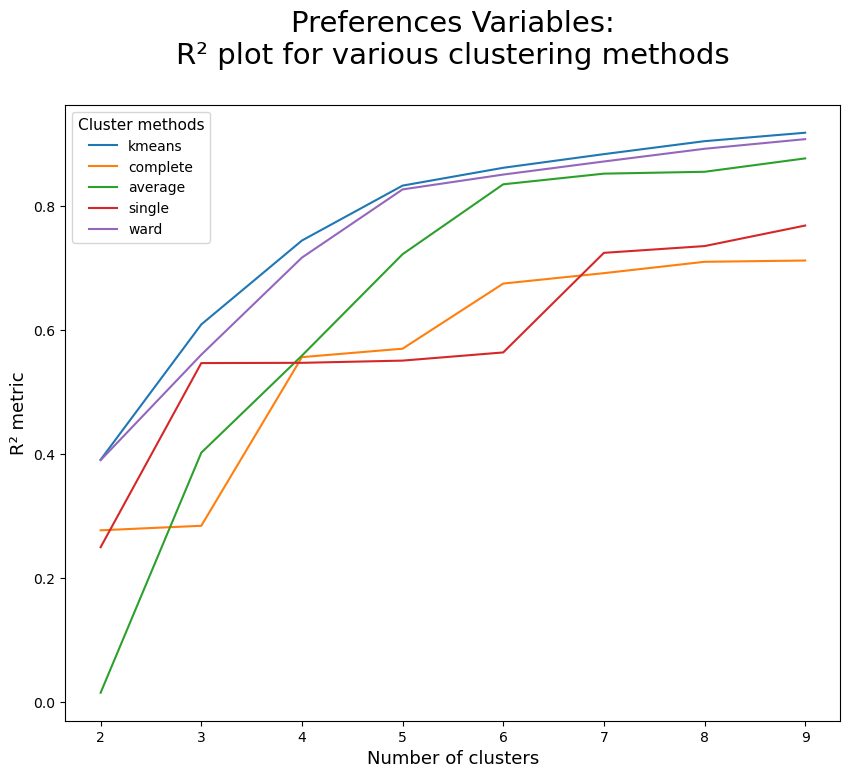

In [ ]:
# visualize the R² scores for each cluster solution on preferences variables
pd.DataFrame(r2_scores_prf).plot.line(figsize=(10,8))

plt.title("Preferences Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

#### Optimal Clusterer on Behavioural Variables

In [ ]:
# obtain the R² scores for each cluster solution on behavioural variables
r2_scores_beh = {}
r2_scores_beh['kmeans'] = get_r2_scores(df_beh, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_beh[linkage] = get_r2_scores(
        df_beh, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores_beh)

kmeans  complete   average    single      ward
2  0.223436  0.009501  0.009501  0.009501  0.208210
3  0.378397  0.041802  0.055468  0.010154  0.323462
4  0.492690  0.117232  0.082948  0.011065  0.415629
5  0.568214  0.191018  0.174784  0.011556  0.485263
6  0.629540  0.197344  0.177469  0.057524  0.549848
7  0.662847  0.209696  0.177664  0.057627  0.596217
8  0.686955  0.273705  0.217575  0.057876  0.627945
9  0.711501  0.359584  0.218703  0.058767  0.654477

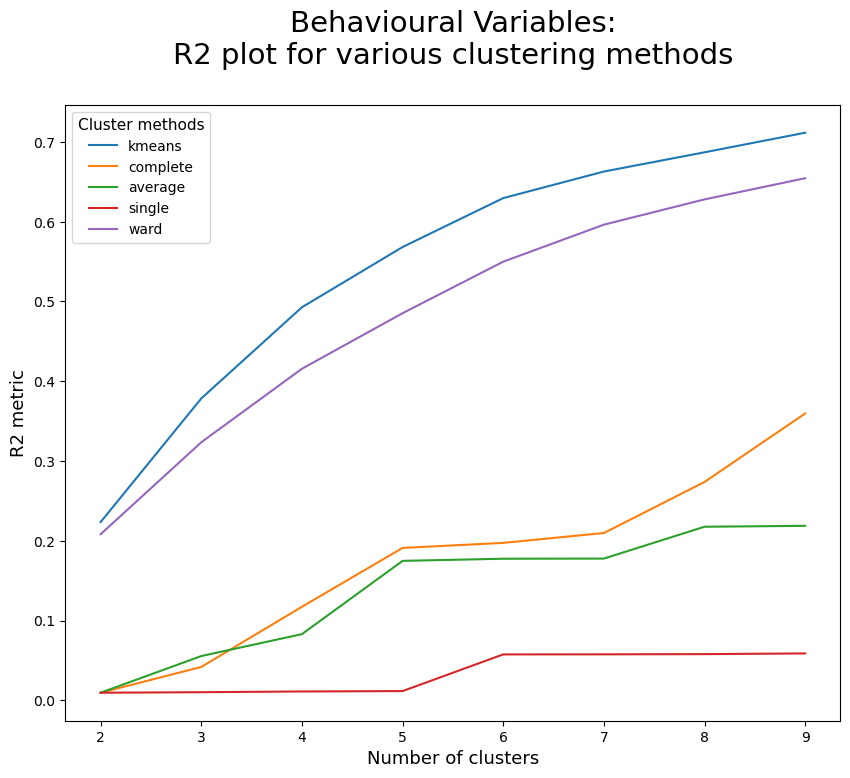

In [ ]:
# visualizing the R² scores for each cluster solution on behavioural variables
pd.DataFrame(r2_scores_beh).plot.line(figsize=(10,8))

plt.title("Behavioural Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

- We chose to use KMeans for our clusters because the previous two graphs clearly show that it consistently achieves the highest R² values.

### Preferential Perspective

In [ ]:
# KMeans clustering algorithm
# grouped into 9 distinct clusters
# selects initial centroids randomly
# run the KMeans algorithm 10 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=9, init='random', n_init=10, random_state=1)

In [ ]:
# fit method
kmclust_prf.fit(df[preferences_features])

KMeans(init='random', n_clusters=9, n_init=10, random_state=1)

In [ ]:
kmclust_prf.predict(df[preferences_features])

array([5, 3, 8, ..., 2, 8, 8], dtype=int32)

In [ ]:
pd.DataFrame(kmclust_prf.transform(df[preferences_features]))

0         1         2         3         4         5         6  \
0      4.022411  1.367998  2.033408  1.804468  2.120145  0.885108  1.487500   
1      2.865802  0.970858  3.248094  0.677020  1.951546  1.407177  2.581991   
2      4.718095  1.716751  2.588948  2.489997  3.418185  2.258385  3.128339   
3      3.268587  1.309084  2.090432  1.329078  1.443601  0.187290  1.223866   
4      3.589768  2.581752  1.642466  2.478951  1.631651  1.333577  0.213024   
...         ...       ...       ...       ...       ...       ...       ...   
31396  4.823319  1.749710  2.598351  2.556624  3.489097  2.304993  3.161267   
31397  4.823319  1.749710  2.598351  2.556624  3.489097  2.304993  3.161267   
31398  4.829239  3.083228  0.117536  3.407809  3.081585  2.289670  1.880732   
31399  4.718095  1.716751  2.588948  2.489997  3.418185  2.258385  3.128339   
31400  4.823319  1.749710  2.598351  2.556624  3.489097  2.304993  3.161267   

              7         8  
0      2.775867  2.025730  
1      1.477011  2.010691  
2      3.470302  0.044622  
3      2.103707  2.110638  
4      2.872008  3.077568  
...         ...       ...  
31396  3.560563  0.177261  
31397  3.560563  0.177261  
31398  4.042805  2.586664  
31399  3.470302  0.044622  
31400  3.560563  0.177261  

[31401 rows x 9 columns]

In [ ]:
# KMeans clustering algorithm
# grouped into 8 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust_prf.fit(df[preferences_features])

KMeans(n_init=15, random_state=1)

In [ ]:
# cluster range for preferential perspective
range_clusters_prf = range(1, 10)

In [ ]:
# empty list to store the inertia values for each number of clusters
inertia_prf = []
for n_clus_prf in range_clusters_prf:  # iterate over desired ncluster range
    kmclust_prf = KMeans(n_clusters=n_clus_prf, init='k-means++', n_init=15, random_state=1)
    kmclust_prf.fit(df[preferences_features])
    inertia_prf.append(kmclust_prf.inertia_) 

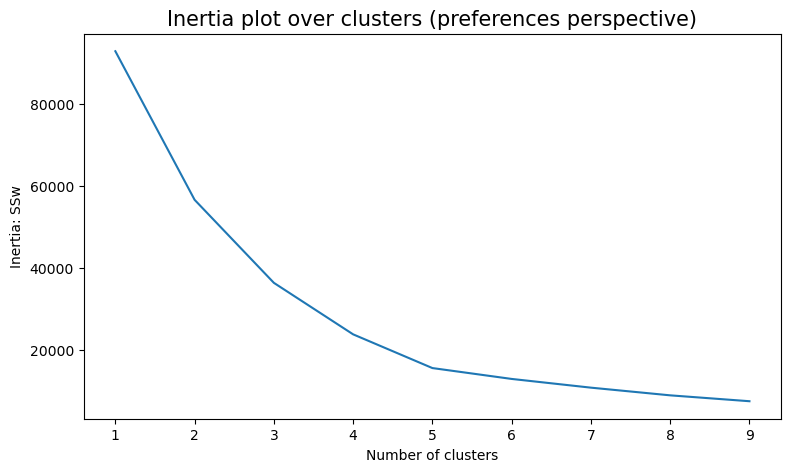

In [ ]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_prf, inertia_prf)
ax.set_xticks(range_clusters_prf)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (preferences perspective)", size=15)

plt.show()

- From this Elbow plot, we can observe that the optimal number of clusters for the preferences perspective is 3, as this is the point where the rate of decrease in within-cluster sum of squares (WSS) significantly slows down.

For n_clusters = 2, the average silhouette_score is : 0.4274453966591505
For n_clusters = 3, the average silhouette_score is : 0.4246163263677979
For n_clusters = 4, the average silhouette_score is : 0.488097449179972
For n_clusters = 5, the average silhouette_score is : 0.5409267132199748
For n_clusters = 6, the average silhouette_score is : 0.512543185250648
For n_clusters = 7, the average silhouette_score is : 0.522336674207284
For n_clusters = 8, the average silhouette_score is : 0.5363671771271328
For n_clusters = 9, the average silhouette_score is : 0.5394352224193847


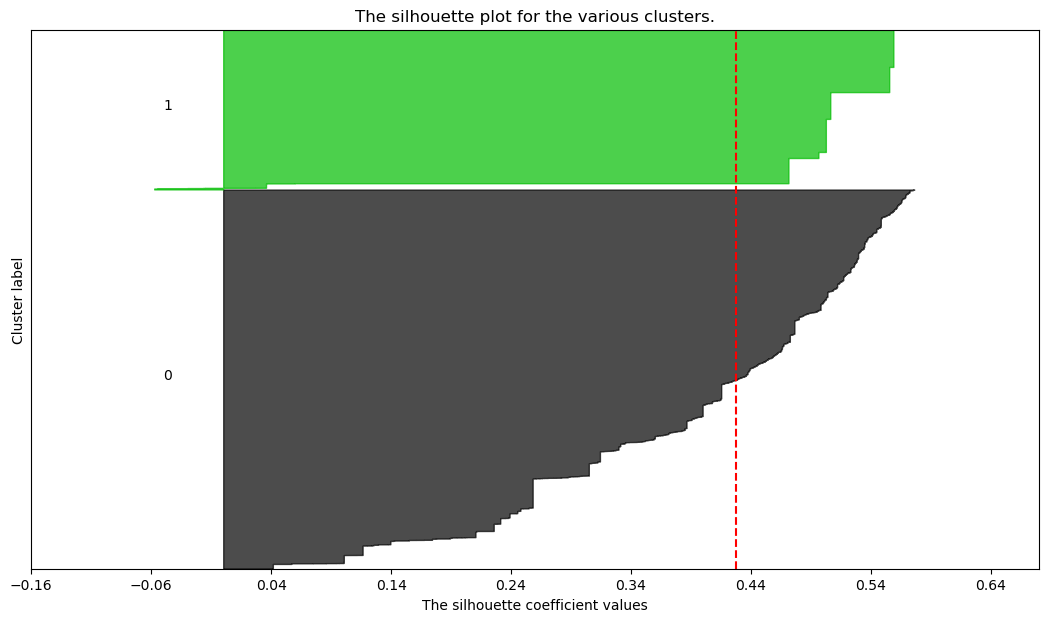

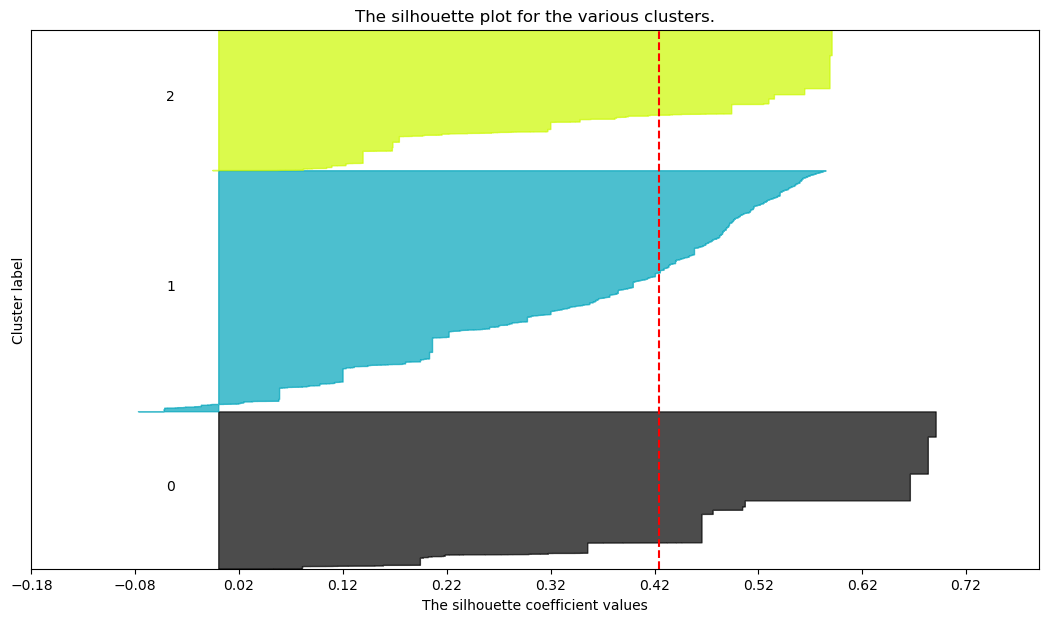

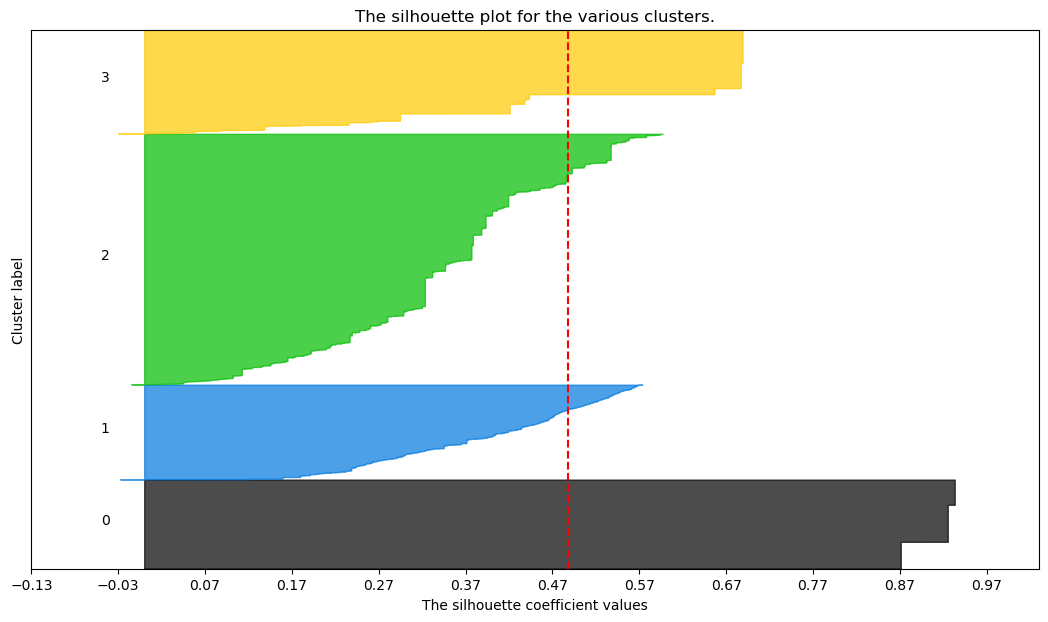

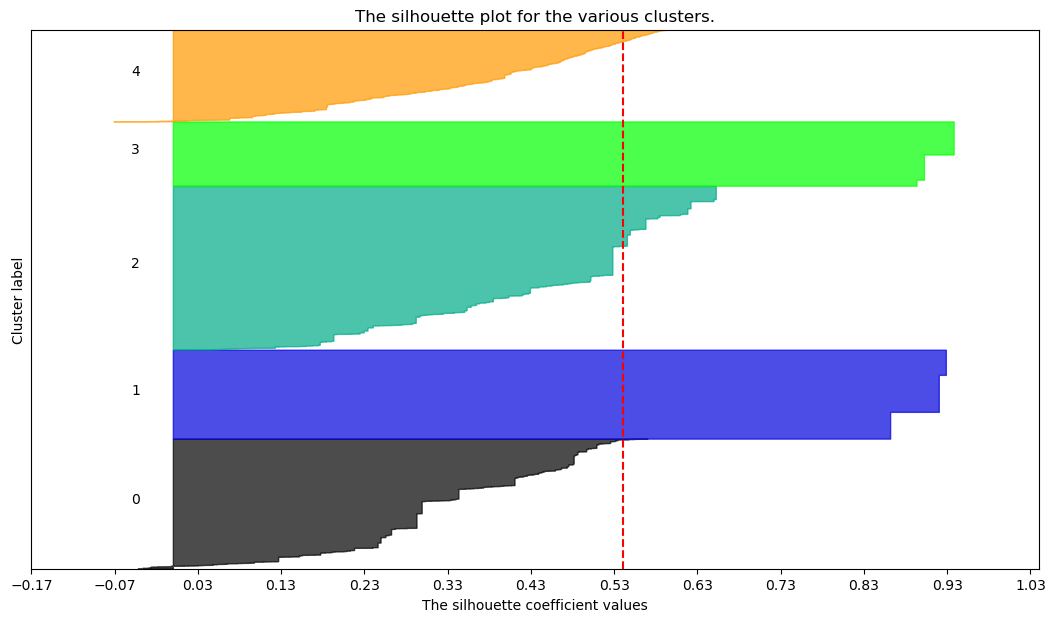

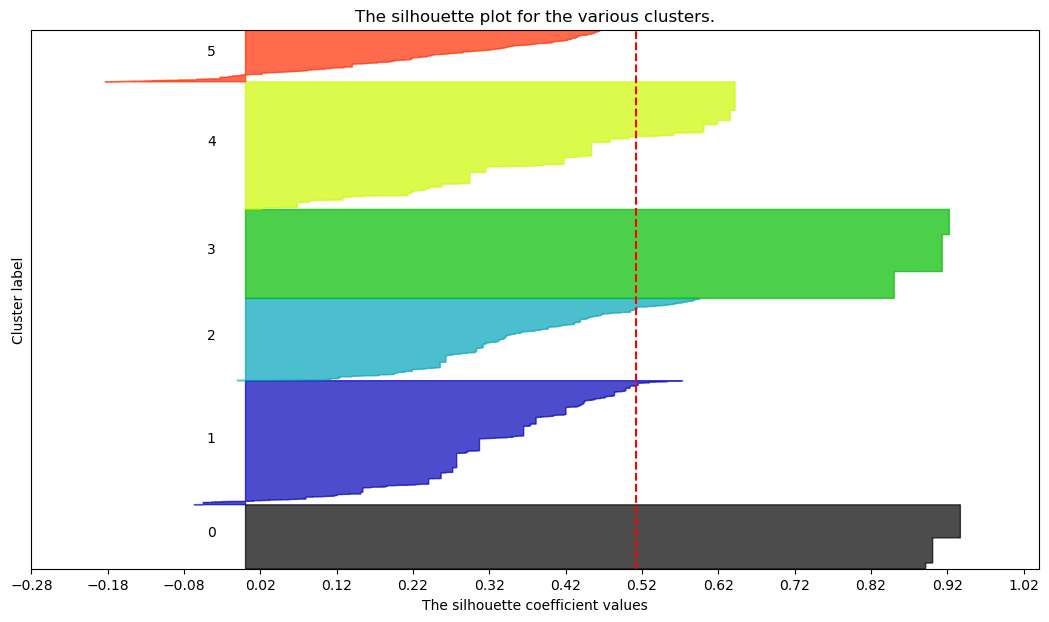

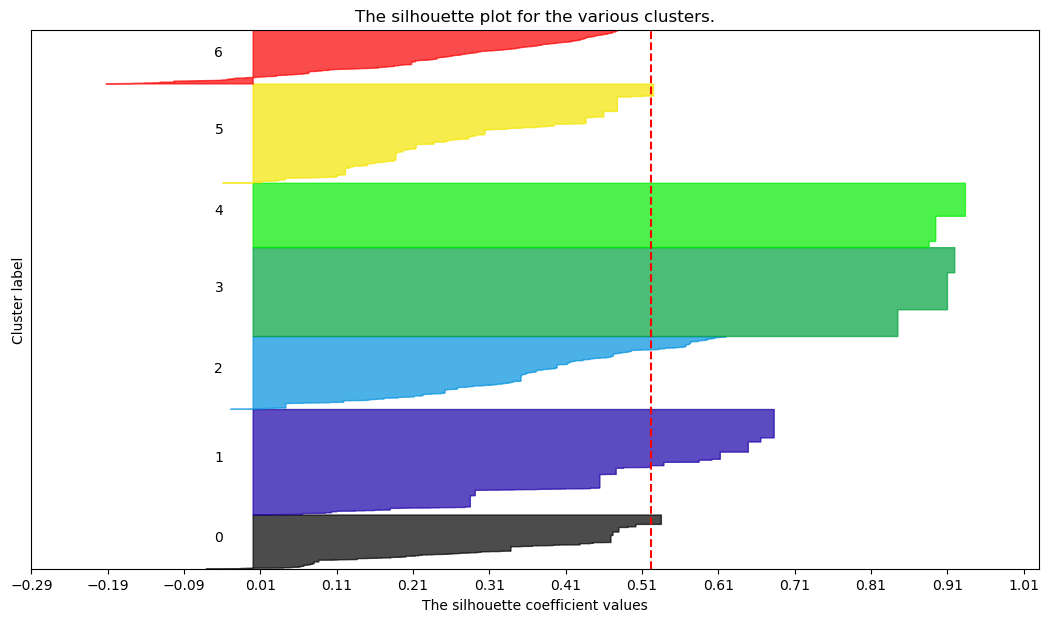

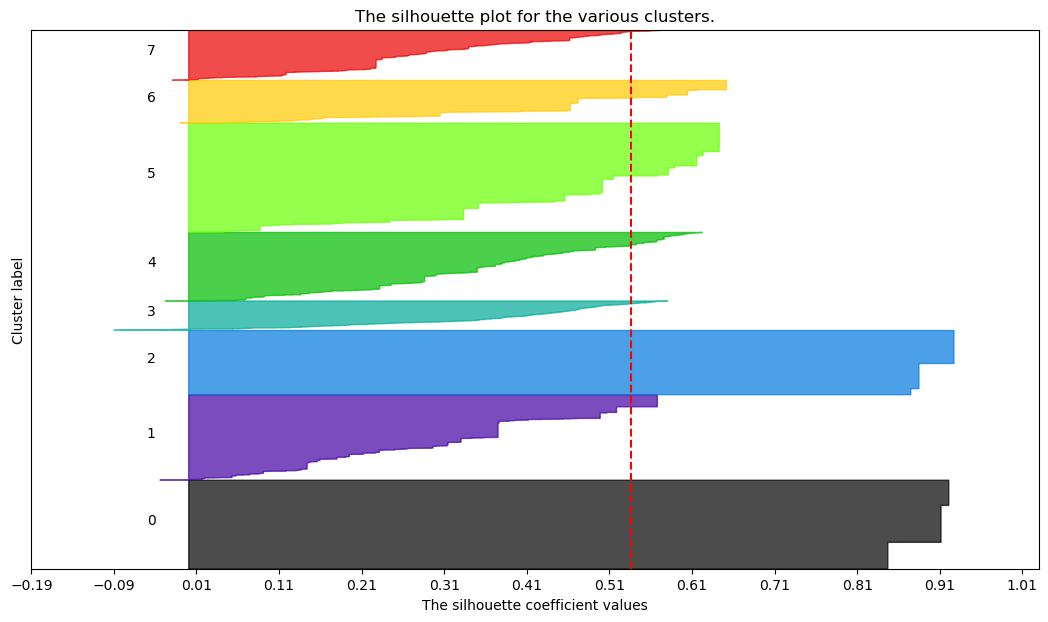

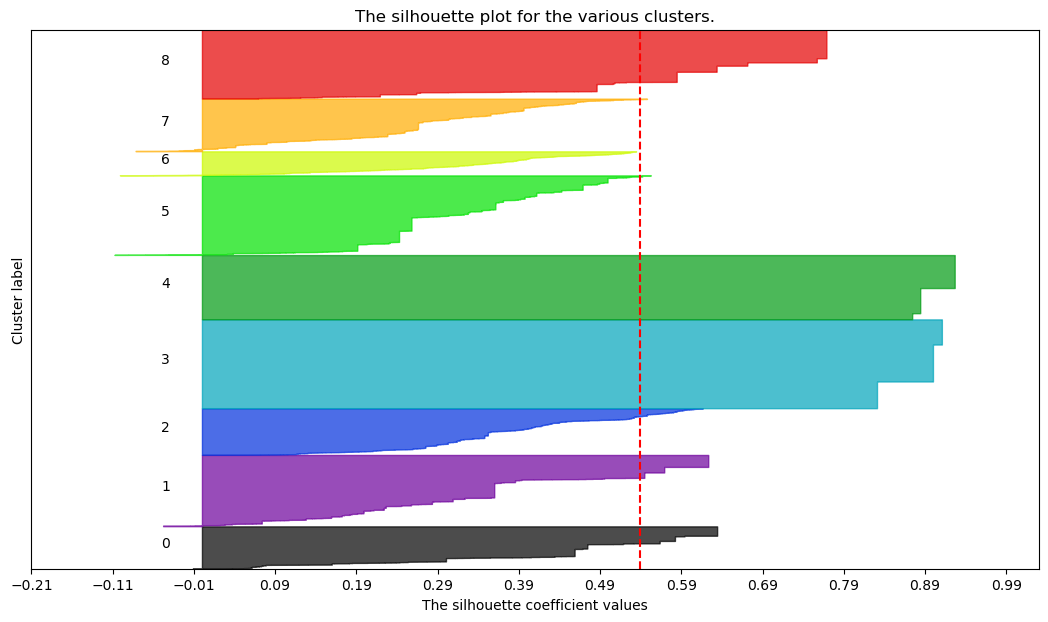

In [ ]:
# storing average silhouette metric
avg_silhouette_prf = []
for nclus_prf in range_clusters_prf:
    # skip nclus == 1
    if nclus_prf == 1:
        continue
    
    fig = plt.figure(figsize=(13, 7))

    # initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility
    kmclust_prf = KMeans(n_clusters=nclus_prf, init='k-means++', n_init=15, random_state=1)
    cluster_labels_prf = kmclust_prf.fit_predict(df[preferences_features])

    # the silhouette_score gives the average value for all the samples.
    # this gives a perspective into the density and separation of the formed clusters
    silhouette_avg_prf = silhouette_score(df[preferences_features], cluster_labels_prf)
    avg_silhouette_prf.append(silhouette_avg_prf)
    print(f"For n_clusters = {nclus_prf}, the average silhouette_score is : {silhouette_avg_prf}")

    # the silhouette scores for each sample
    sample_silhouette_values_prf = silhouette_samples(df[preferences_features], cluster_labels_prf)

    y_lower = 10
    for i in range(nclus_prf):
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values_prf = sample_silhouette_values_prf[cluster_labels_prf == i]
        ith_cluster_silhouette_values_prf.sort()
        
        # get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values_prf.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus_prf)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_prf,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # the vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg_prf, color="red", linestyle="--")
    
    # the silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values_prf.min() -0.1, 2), np.round(sample_silhouette_values_prf.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # the (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[preferences_features]) + (nclus_prf + 1) * 10])

    plt.yticks([])  # clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

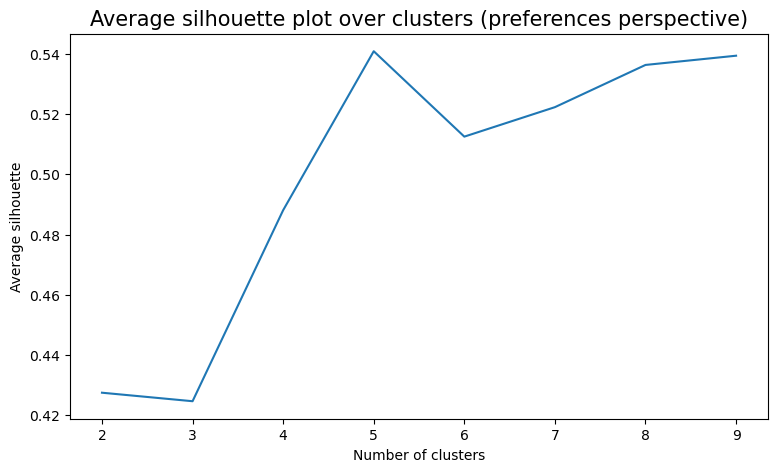

In [ ]:
# average silhouette plot for preferential perspective
# inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters_prf[1:], # X-axis; 
         avg_silhouette_prf)     # Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters (preferences perspective)", size=15)
plt.show()

- From the Silhouette plot, for the preferences perspective, the optimal number of clusters is 5, as this is the point where the average silhouette score reaches its peak. 

In [ ]:
# final cluster solution of the preferential perspective
number_clusters_prf = 5
kmclust_prf = KMeans(n_clusters=number_clusters_prf, init='k-means++', n_init=15, random_state=1)
km_labels_prf = kmclust_prf.fit_predict(df[preferences_features])
km_labels_prf

array([0, 2, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
# characterizing the final clusters of the preferential perspective
df_concat = pd.concat((df[preferences_features], pd.Series(km_labels_prf, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption
labels                                                                   
0                  -0.361880                 -0.053876          -0.858886
1                   1.472881                 -0.902976           0.964013
2                  -0.463067                 -0.149384           0.756268
3                   1.472881                 -0.830063          -1.622266
4                  -1.083398                  1.730392           0.068671

### Behavioural Perspective

In [ ]:
# KMeans clustering algorithm
# grouped into 9 distinct clusters
# selects initial centroids randomly
# run the KMeans algorithm 10 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_beh = KMeans(n_clusters=9, init='random', n_init=10, random_state=1)

In [ ]:
# fit method
kmclust_beh.fit(df[behavioural_features])

KMeans(init='random', n_clusters=9, n_init=10, random_state=1)

In [ ]:
kmclust_beh.predict(df[behavioural_features])

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
pd.DataFrame(kmclust_beh.transform(df[behavioural_features]))

0          1          2          3          4          5  \
0      21.694314  23.699500  15.183842  23.210397  23.083392  22.324565   
1      21.721023  23.691206  15.176194  23.196459  23.113805  22.313066   
2      21.769093  23.701405  15.197588  23.201216  23.164468  22.321105   
3      10.830391  12.262345   3.430144  11.529567  11.547632  10.937760   
4      10.891859  12.471350   4.066717  11.778244  11.579163  11.184859   
...          ...        ...        ...        ...        ...        ...   
31396   6.973560   1.623155   9.889669   3.312375   4.218056   4.490610   
31397   6.970037   1.613798   9.887962   3.308626   4.210450   4.488098   
31398   6.831981   2.084489   9.941968   3.707459   3.594785   4.835395   
31399   6.811363   1.966864   9.919781   3.634844   3.577214   4.777482   
31400   6.969428   1.596012   9.909898   3.342054   4.195690   4.507570   

               6          7          8  
0      23.240074  22.197123  23.547556  
1      23.222267  22.190547  23.621685  
2      23.222995  22.203793  23.716950  
3      11.702850  10.418221  12.003910  
4      11.966563  10.651715  11.817693  
...          ...        ...        ...  
31396   3.272897   4.808061   4.723815  
31397   3.269891   4.804679   4.711538  
31398   3.806450   4.939141   2.716918  
31399   3.728595   4.893018   2.791363  
31400   3.297392   4.839236   4.658746  

[31401 rows x 9 columns]

In [ ]:
# KMeans clustering algorithm
# grouped into 8 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs 
kmclust_beh = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust_beh.fit(df[behavioural_features])

KMeans(n_init=15, random_state=1)

In [ ]:
# cluster range for behavioural perspective
range_clusters_beh = range(1, 10)

In [ ]:
# empty list to store the inertia values for each number of clusters
inertia_beh = []
for n_clus_beh in range_clusters_beh:  # iterate over desired ncluster range
    kmclust_beh = KMeans(n_clusters=n_clus_beh, init='k-means++', n_init=15, random_state=1)
    kmclust_beh.fit(df[behavioural_features])
    inertia_beh.append(kmclust_beh.inertia_)

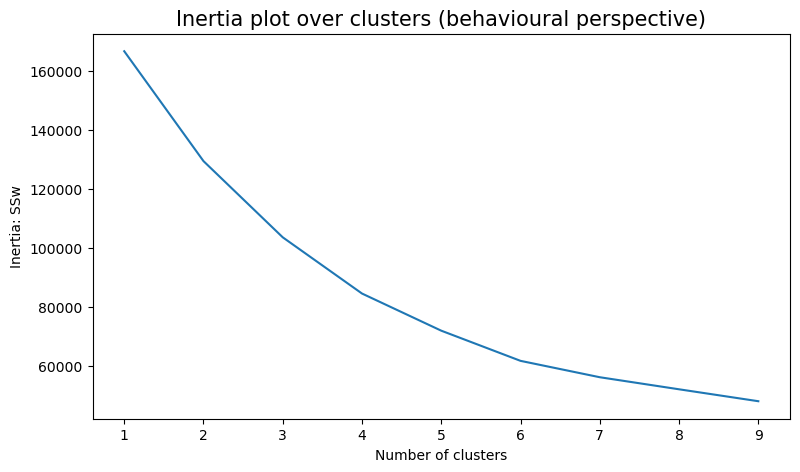

In [ ]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_beh, inertia_beh)
ax.set_xticks(range_clusters_beh)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (behavioural perspective)", size=15)

plt.show()

- Once again, from the graph we can observe that the optimal number of cluster for the behavioural perspective is 3.

For n_clusters = 2, the average silhouette_score is : 0.3354015210177746
For n_clusters = 3, the average silhouette_score is : 0.27435429404663847
For n_clusters = 4, the average silhouette_score is : 0.2837005815088819
For n_clusters = 5, the average silhouette_score is : 0.3008044943251685
For n_clusters = 6, the average silhouette_score is : 0.308120743428207
For n_clusters = 7, the average silhouette_score is : 0.28316354951564887
For n_clusters = 8, the average silhouette_score is : 0.26010391673465405
For n_clusters = 9, the average silhouette_score is : 0.2660864220857173


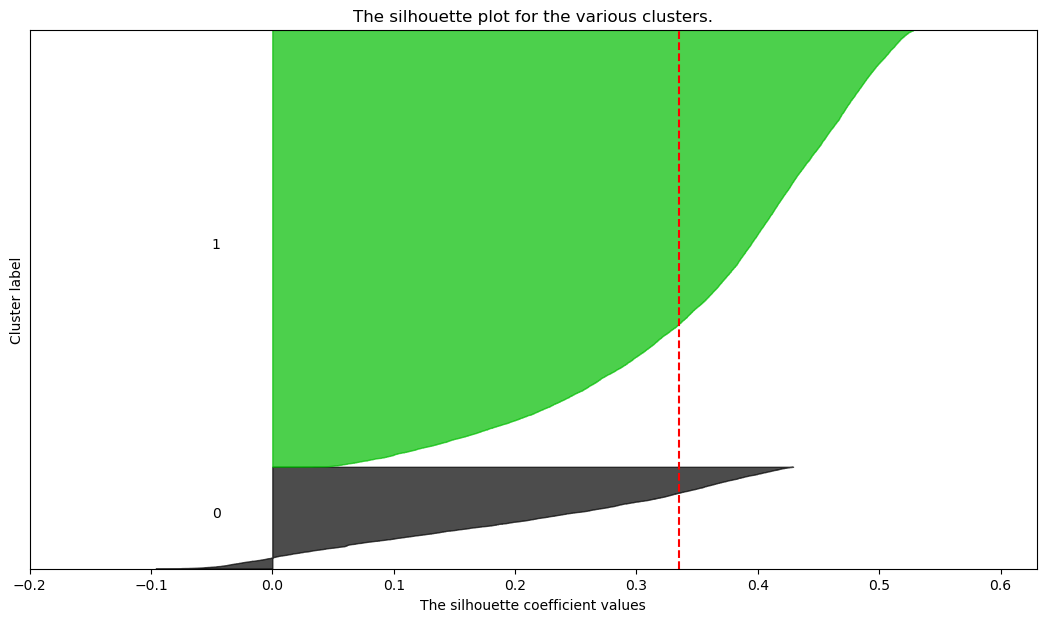

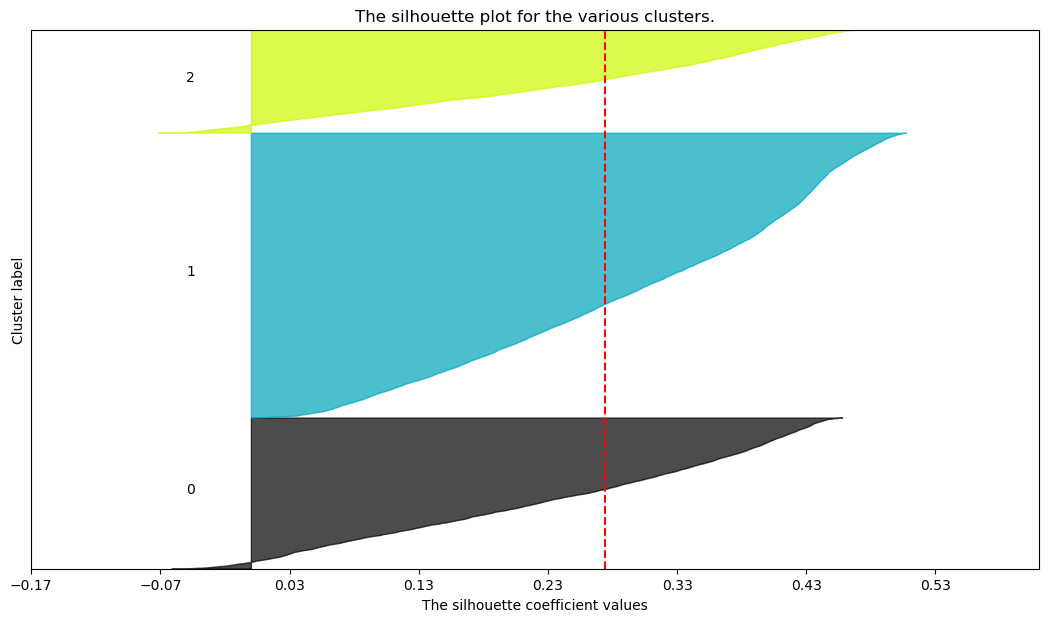

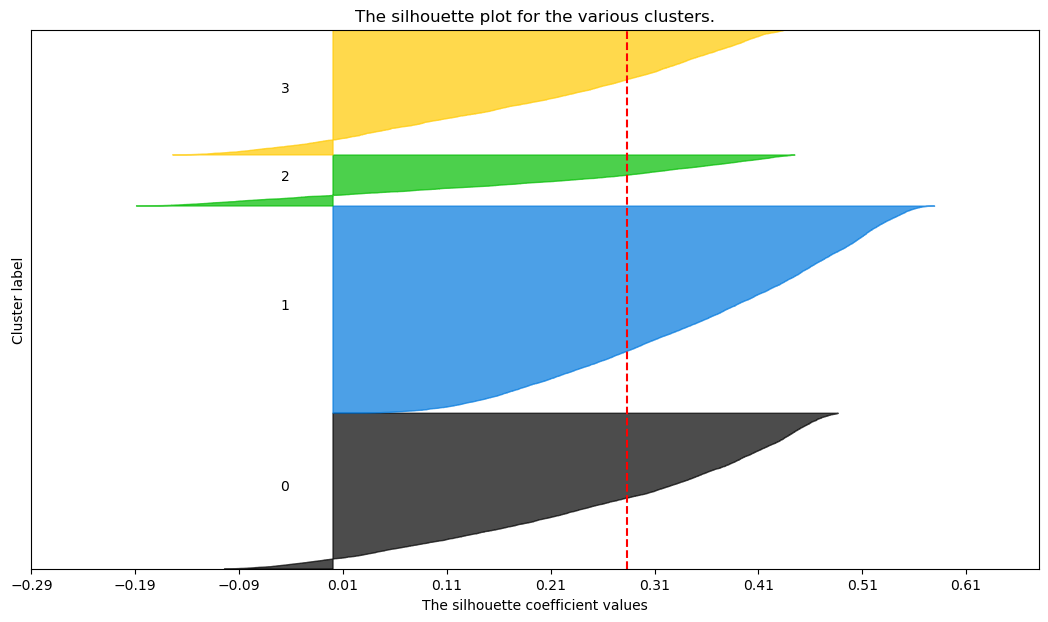

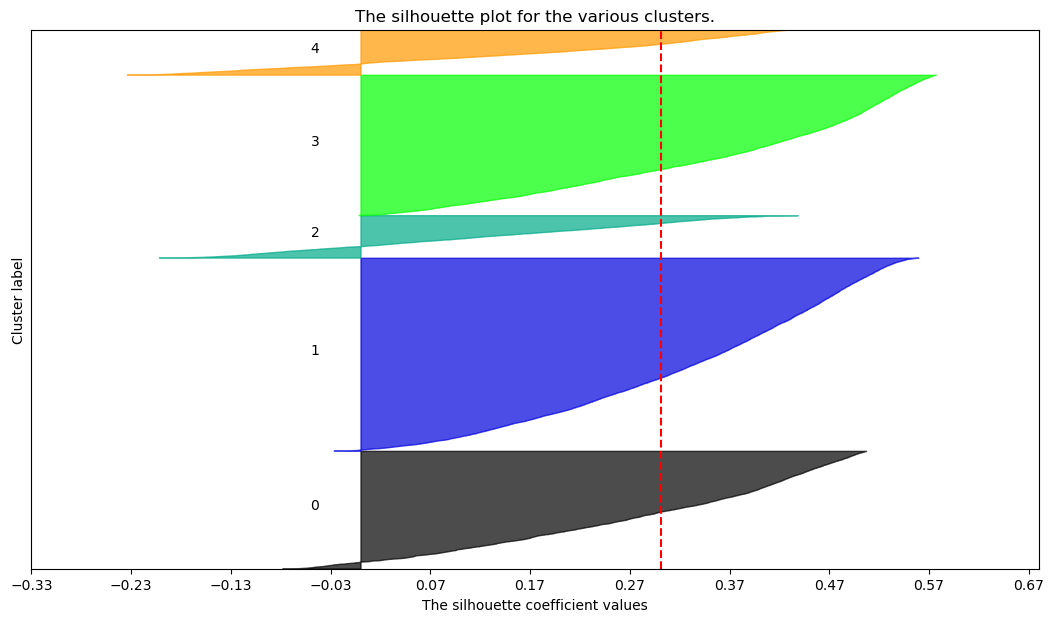

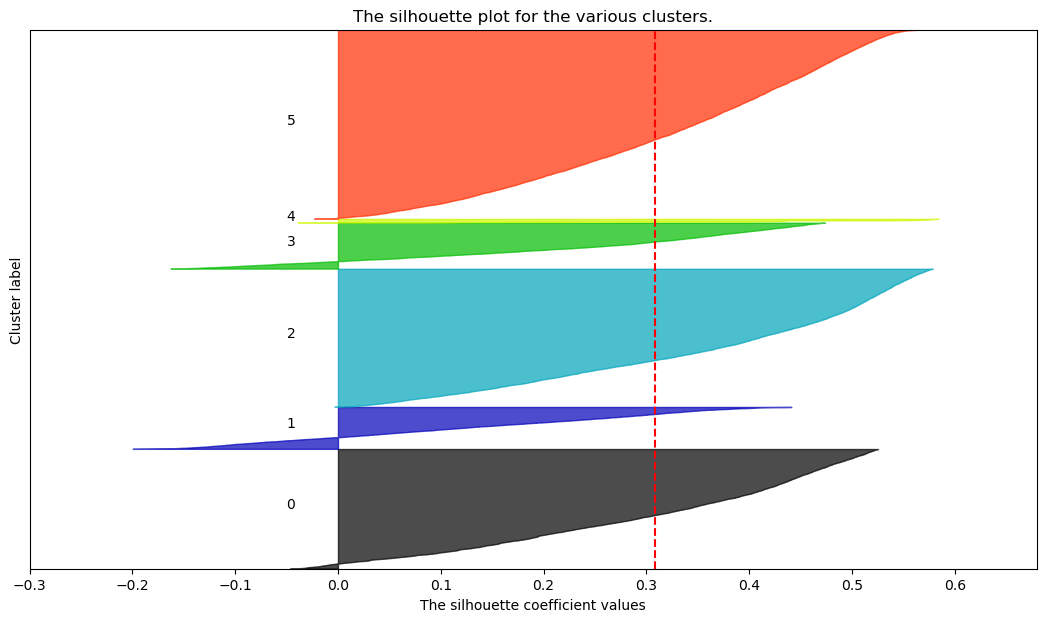

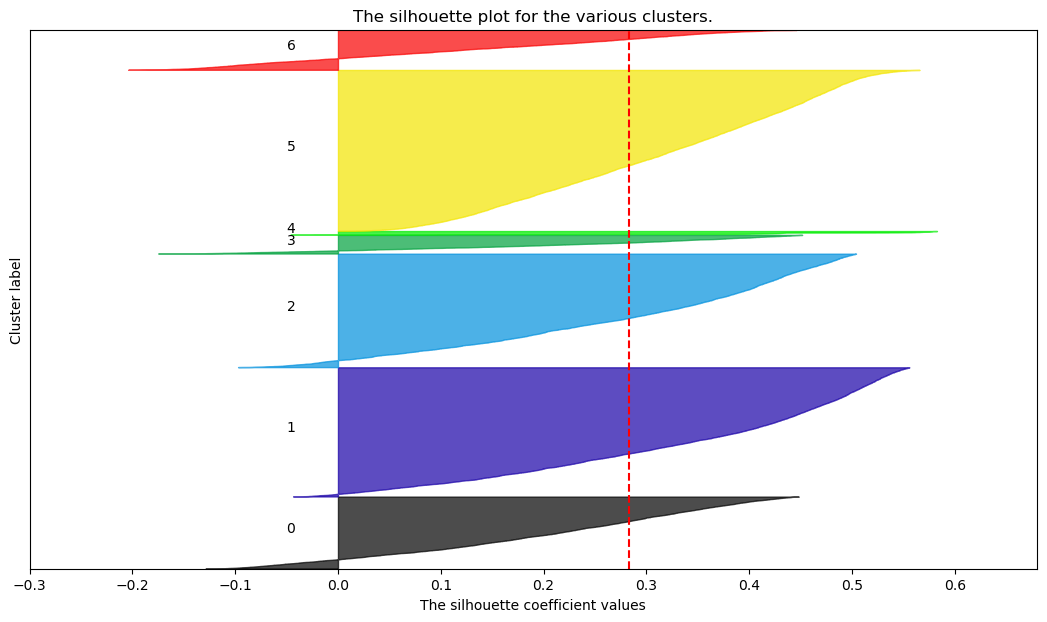

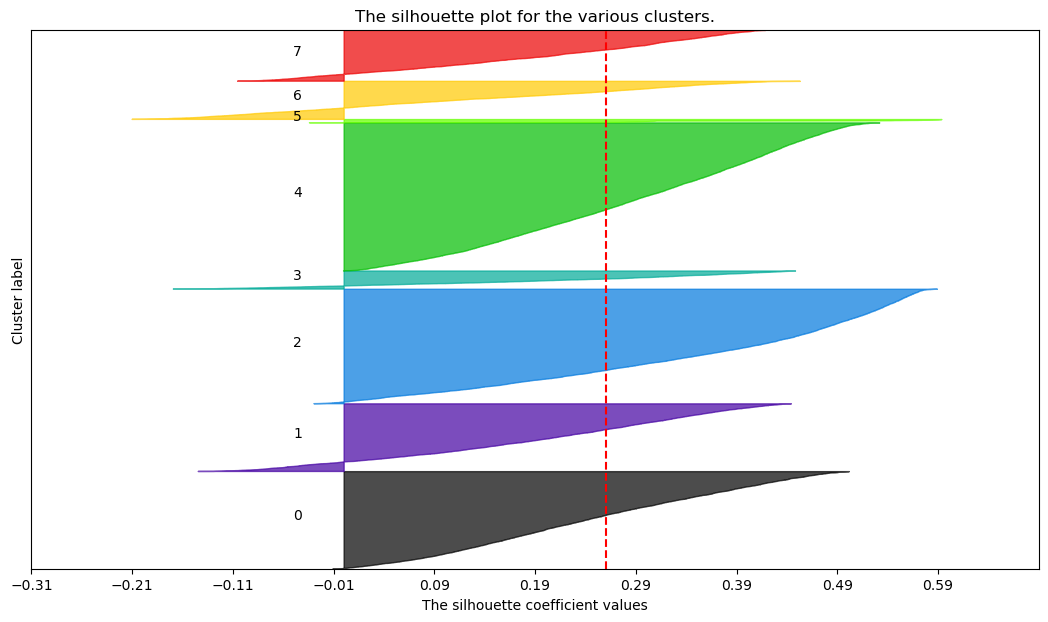

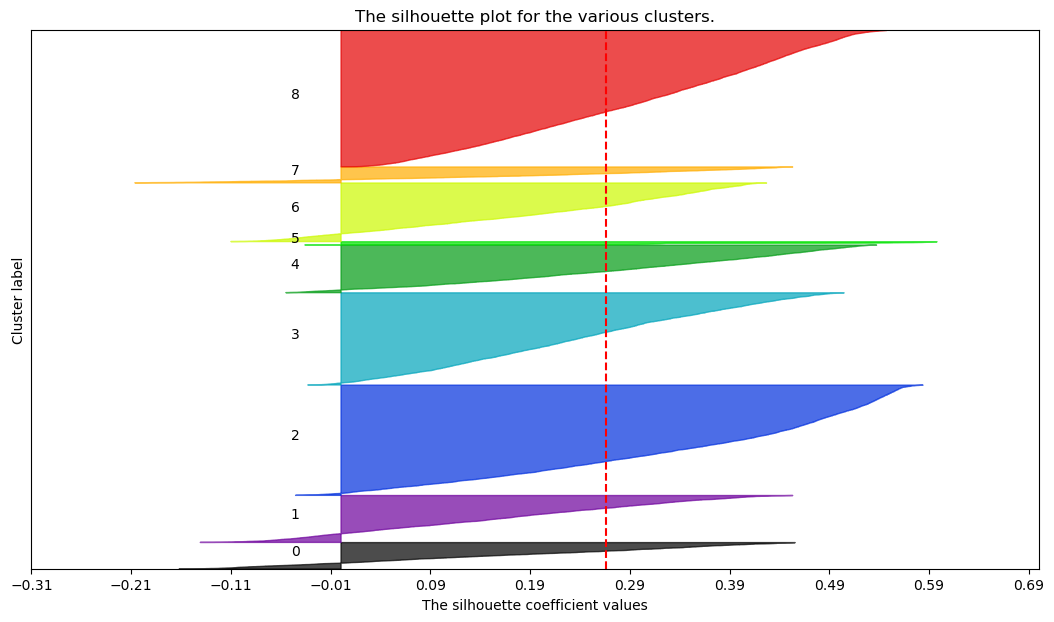

In [ ]:
# storing average silhouette metric
avg_silhouette_beh = []
for nclus_beh in range_clusters_beh:
    # skip nclus == 1
    if nclus_beh == 1:
        continue

    fig = plt.figure(figsize=(13, 7))

    # initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility
    kmclust_beh = KMeans(n_clusters=nclus_beh, init='k-means++', n_init=15, random_state=1)
    cluster_labels_beh = kmclust_beh.fit_predict(df[behavioural_features])

    # silhouette_score gives the average value for all the samples
    # this gives a perspective into the density and separation of the formed clusters
    silhouette_avg_beh = silhouette_score(df[behavioural_features], cluster_labels_beh)
    avg_silhouette_beh.append(silhouette_avg_beh)
    print(f"For n_clusters = {nclus_beh}, the average silhouette_score is : {silhouette_avg_beh}")

    # compute the silhouette scores for each sample
    sample_silhouette_values_beh = silhouette_samples(df[behavioural_features], cluster_labels_beh)

    y_lower = 10
    for i in range(nclus_beh):
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values_beh = sample_silhouette_values_beh[cluster_labels_beh == i]
        ith_cluster_silhouette_values_beh.sort()
        
        # get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values_beh.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus_beh)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_beh,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # tompute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # the vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg_beh, color="red", linestyle="--")
    
    # the silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values_beh.min() -0.1, 2), np.round(sample_silhouette_values_beh.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # the (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[behavioural_features]) + (nclus_beh + 1) * 10])

    plt.yticks([])  # clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

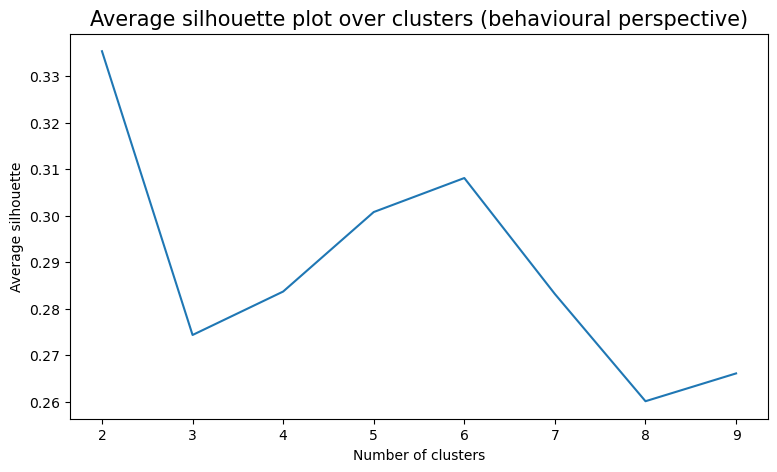

In [ ]:
# average silhouette plot for the behavioural perspective
# inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters_beh[1:], # X-axis; 
         avg_silhouette_beh)     #  Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters (behavioural perspective)", size=15)
plt.show()

- Based on the Silhouette plot for the behavioral perspective, the optimal number of clusters is 2, as this is where the average silhouette score is at its highest.

In [ ]:
# final cluster solution of the behavioural perspective
number_clusters_beh = 2
kmclust_beh = KMeans(n_clusters=number_clusters_beh, init='k-means++', n_init=15, random_state=1)
km_labels_beh = kmclust_beh.fit_predict(df[behavioural_features])
km_labels_beh

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# characterizing the final clusters of the behavioural perspective
df_concat = pd.concat((df[behavioural_features], pd.Series(km_labels_beh, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

first_order  days_since_last_order  order_frequency  total_orders  \
labels                                                                      
0         -0.795565               0.558983         1.008685      1.245578   
1          0.192661              -0.137253        -0.266054     -0.337726   

        total_amount_spent  average_spending  
labels                                        
0                 1.154813         -0.061890  
1                -0.309080          0.015683

### Merging Perspectives